Mean Loss: $162,754.79
Variance of Loss: $1,419,767,942,161.63
99% Value-at-Risk (VaR): $2,309,856.01


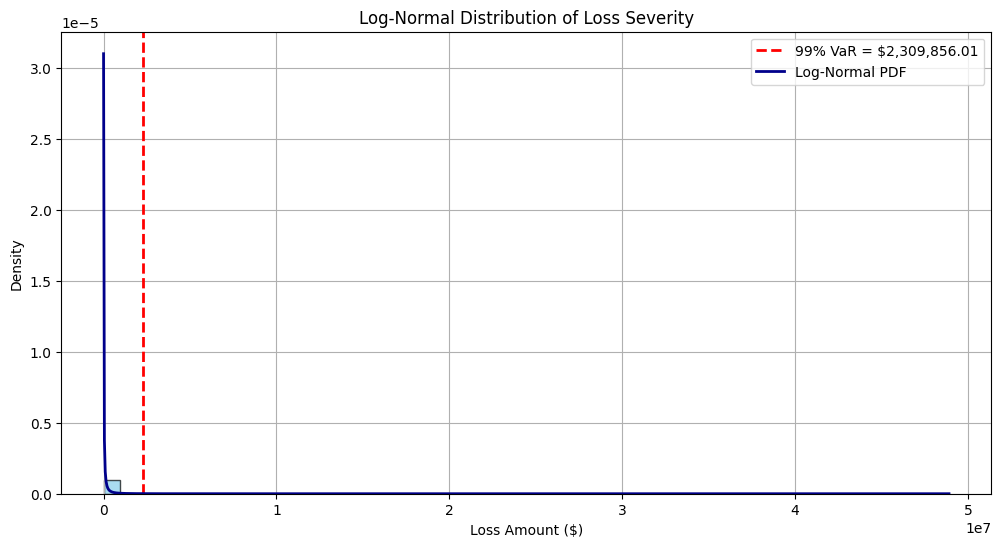

Sample Mean Loss: $194,007.37
Sample Standard Deviation of Loss: $1,627,196.67
Sample 99th Percentile (empirical VaR): $2,263,245.36


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Define the parameters for the Log-Normal distribution
mu = 10  # Mean of the log of losses
sigma = 2  # Standard deviation of the log of losses

# Step 2: Calculate the mean and variance of the actual (non-logarithmic) loss amounts
mean_loss = np.exp(mu + sigma**2 / 2)
variance_loss = (np.exp(sigma**2) - 1) * np.exp(2 * mu + sigma**2)

print(f"Mean Loss: ${mean_loss:,.2f}")
print(f"Variance of Loss: ${variance_loss:,.2f}")

# Step 3: Generate sample data from the Log-Normal distribution
np.random.seed(42)  # For reproducibility
sample_size = 1000
sample_losses = np.random.lognormal(mean=mu, sigma=sigma, size=sample_size)

# Step 4: Calculate the 99% Value-at-Risk (VaR)
confidence_level = 0.99
z_99 = stats.norm.ppf(confidence_level)  # z-score for 99% confidence
VaR_99 = np.exp(mu + z_99 * sigma)

print(f"99% Value-at-Risk (VaR): ${VaR_99:,.2f}")

# Step 5: Plot the distribution of losses and the 99% VaR threshold
plt.figure(figsize=(12, 6))
plt.hist(sample_losses, bins=50, color='skyblue', edgecolor='black', alpha=0.7, density=True)
plt.axvline(VaR_99, color='red', linestyle='--', linewidth=2, label=f'99% VaR = ${VaR_99:,.2f}')

# Plotting the theoretical Log-Normal PDF for comparison
x = np.linspace(min(sample_losses), max(sample_losses), 1000)
pdf = stats.lognorm.pdf(x, s=sigma, scale=np.exp(mu))
plt.plot(x, pdf, color='darkblue', lw=2, label='Log-Normal PDF')

plt.title("Log-Normal Distribution of Loss Severity")
plt.xlabel("Loss Amount ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Summary statistics
print(f"Sample Mean Loss: ${np.mean(sample_losses):,.2f}")
print(f"Sample Standard Deviation of Loss: ${np.std(sample_losses):,.2f}")
print(f"Sample 99th Percentile (empirical VaR): ${np.percentile(sample_losses, 99):,.2f}")


Explanation of the Output
Mean and Variance: The output will display the calculated mean and variance, showing the expected values based on the parameters.
99% VaR: This value is the threshold above which only 1% of the loss events are expected to fall, providing an estimate for capital requirements.
Distribution Plot: The plot will show a right-skewed histogram with the red line marking the 99% VaR, illustrating the heavy-tail nature of the losses.
This Python code provides a complete approach to model loss severity using a Log-Normal distribution, with insights into the distribution's characteristics and its application in operational risk management. Let me know if you'd like further details or customization!

Poisson probabilities for different event counts:
P(X = 0) = 0.0183
P(X = 1) = 0.0733
P(X = 2) = 0.1465
P(X = 3) = 0.1954
P(X = 4) = 0.1954
P(X = 5) = 0.1563
P(X = 6) = 0.1042
P(X = 7) = 0.0595
P(X = 8) = 0.0298
P(X = 9) = 0.0132
P(X = 10) = 0.0053
P(X = 11) = 0.0019
P(X = 12) = 0.0006
P(X = 13) = 0.0002
P(X = 14) = 0.0001
P(X = 15) = 0.0000


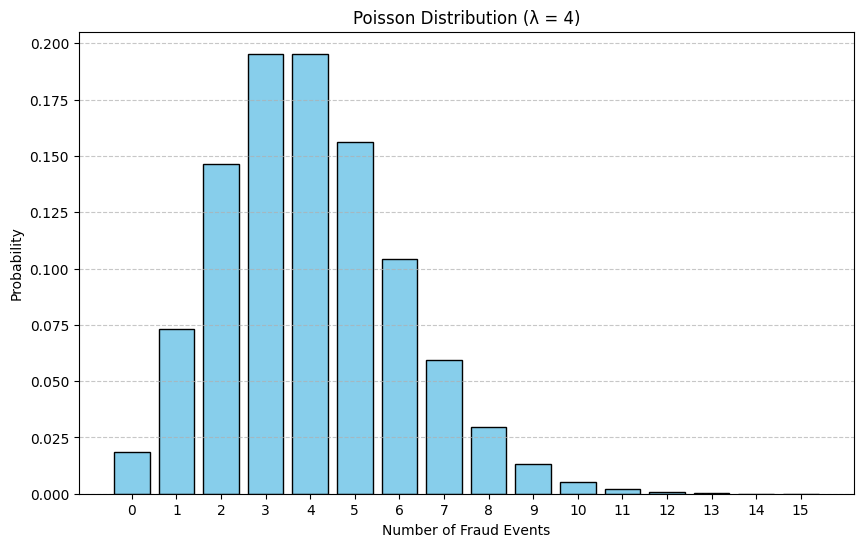

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the average rate of fraud events per month
lambda_rate = 4  # average fraud events per month

# Generate a range of possible event counts (e.g., 0 to 15 events)
k_values = np.arange(0, 16)
poisson_probabilities = stats.poisson.pmf(k_values, lambda_rate)

# Display the probabilities
print("Poisson probabilities for different event counts:")
for k, prob in zip(k_values, poisson_probabilities):
    print(f"P(X = {k}) = {prob:.4f}")

# Plotting the Poisson distribution
plt.figure(figsize=(10, 6))
plt.bar(k_values, poisson_probabilities, color='skyblue', edgecolor='black')
plt.title(f'Poisson Distribution (λ = {lambda_rate})')
plt.xlabel('Number of Fraud Events')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set the number of records
num_records = 16000

# Set start date for a 4-year period
start_date = datetime.now() - timedelta(days=4*365)

# Generate random dates within the last 4 years
dates = [start_date + timedelta(days=random.randint(0, 365*4)) for _ in range(num_records)]

# Unique Event IDs
event_ids = [f"EVT{str(i).zfill(5)}" for i in range(1, num_records + 1)]

# Expanded Event Types with special symbols
event_types = [
    "Fraud$", "System-Failure@", "Compliance#", "Physical*Damage", "Data&Breach", 
    "Unauthorized*Access", "Payment@Error", "Transaction-Fraud!", "Security#Breach"
]

# Expanded Business Lines with special symbols
business_lines = [
    "Retail_Banking", "Corporate-Banking!", "Insurance&", "Wealth*Management", 
    "Investment$Banking", "Treasury#Services", "Private@Equity", "Risk&Compliance"
]

# Generate random Event Type and Business Line
event_type = [random.choice(event_types) for _ in range(num_records)]
business_line = [random.choice(business_lines) for _ in range(num_records)]

# Generate random Event Descriptions based on Event Type
event_descriptions = [
    f"{etype} event in {bl}. Issue resolved with some losses." 
    for etype, bl in zip(event_type, business_line)
]

# Random Net Loss Amounts
net_loss_amount = [round(random.uniform(1000, 50000), 2) for _ in range(num_records)]

# Create the DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Event ID": event_ids,
    "Event Type": event_type,
    "Business Line": business_line,
    "Event Description": event_descriptions,
    "Net Loss Amount": net_loss_amount
})

# Save to CSV
df.to_csv("operational_risk_dataset_expanded.csv", index=False)


                         Date  Event ID      Event Type      Business Line  \
0  2021-11-25 12:51:38.023694  EVT00001      Compliance  Wealth Management   
1  2023-01-27 12:51:38.023694  EVT00002           Fraud  Corporate Banking   
2  2021-04-18 12:51:38.023694  EVT00003  System Failure     Retail Banking   
3  2024-03-16 12:51:38.023694  EVT00004  System Failure  Wealth Management   
4  2023-06-09 12:51:38.023694  EVT00005      Compliance          Insurance   

                                   Event Description  Net Loss Amount  
0  Compliance event in Wealth Management. Issue r...         18970.12  
1  Fraud event in Corporate Banking. Issue resolv...         16703.61  
2  System Failure event in Retail Banking. Issue ...          2651.15  
3  System Failure event in Wealth Management. Iss...          5375.81  
4  Compliance event in Insurance. Issue resolved ...         23009.76  

Severity Statistics by Event Type:
                    Mean Loss      Variance  Count
Event Type  

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29920\959645380.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_stats['99% VaR'] = df.groupby("Event Type").apply(calculate_var)


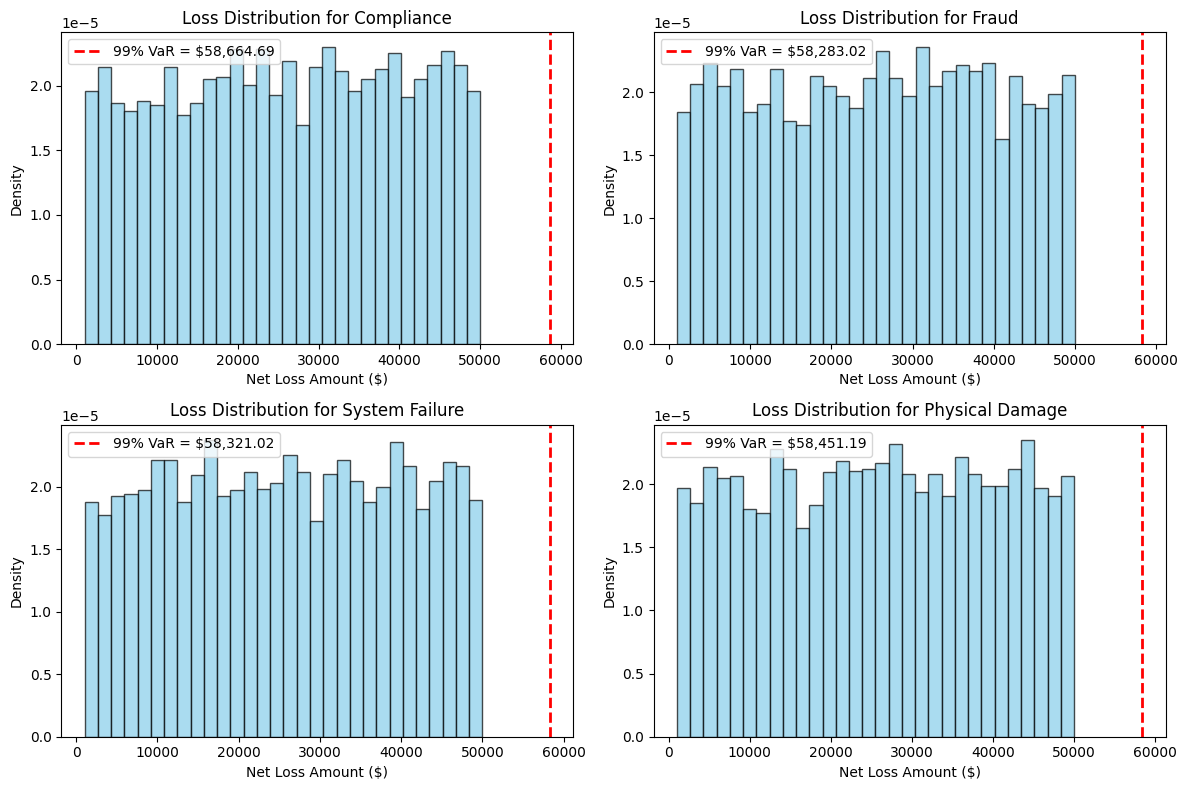

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data
df = pd.read_csv("operational_risk_dataset.csv")

# Check the first few rows of the dataset
print(df.head())

# Step 1: Group by Event Type and Calculate Severity Statistics
severity_stats = df.groupby("Event Type")["Net Loss Amount"].agg(['mean', 'var', 'count'])
severity_stats.columns = ['Mean Loss', 'Variance', 'Count']
print("\nSeverity Statistics by Event Type:")
print(severity_stats)

# Step 2: Calculate 99% Value-at-Risk (VaR) for Each Event Type
confidence_level = 0.99
z_99 = stats.norm.ppf(confidence_level)  # z-score for 99% confidence

# Function to calculate VaR for each group
def calculate_var(group):
    mean = group["Net Loss Amount"].mean()
    std_dev = group["Net Loss Amount"].std()
    VaR = mean + z_99 * std_dev  # VaR calculation for normal approximation
    return VaR

# Apply the function to each event type
severity_stats['99% VaR'] = df.groupby("Event Type").apply(calculate_var)
print("\n99% Value-at-Risk (VaR) by Event Type:")
print(severity_stats[['Mean Loss', '99% VaR']])

# Step 3: Visualize Loss Distributions and VaR for Each Event Type
plt.figure(figsize=(12, 8))

# Loop through each event type and plot the distribution
for i, event_type in enumerate(df["Event Type"].unique()):
    plt.subplot(2, 2, i + 1)
    losses = df[df["Event Type"] == event_type]["Net Loss Amount"]
    
    # Plot histogram of losses
    plt.hist(losses, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
    
    # Plot VaR line
    VaR = severity_stats.loc[event_type, '99% VaR']
    plt.axvline(VaR, color='red', linestyle='--', linewidth=2, label=f'99% VaR = ${VaR:,.2f}')
    
    # Labeling and title
    plt.title(f"Loss Distribution for {event_type}")
    plt.xlabel("Net Loss Amount ($)")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()


Explanation of Each Step
Load the Data:

We load the dataset from "operational_risk_dataset.csv" using pd.read_csv() and print the first few rows to inspect it.
Group by Event Type and Calculate Severity Statistics:

We group the data by "Event Type" and calculate the mean and variance of the "Net Loss Amount" for each event type using agg(['mean', 'var', 'count']).
This gives us a summary table with the mean and variance, indicating the average loss and variability for each event type.
Calculate 99% Value-at-Risk (VaR):

We calculate the 99% VaR using a normal approximation:
VaR
99
%
=
Mean Loss
+
𝑧
0.99
×
Standard Deviation
VaR 
99%
​
 =Mean Loss+z 
0.99
​
 ×Standard Deviation
Here, 
𝑧
0.99
z 
0.99
​
  is the z-score for the 99th percentile, which we get with stats.norm.ppf(0.99).
We define a function calculate_var that takes each event type’s losses, computes the mean and standard deviation, and calculates the VaR. This function is applied to each group to add the VaR to our summary table.
Visualize the Results:

We create a subplot for each event type, plotting a histogram of the "Net Loss Amount" distribution.
We overlay the calculated 99% VaR for each event type as a vertical red dashed line, indicating the threshold above which only 1% of losses are expected to fall.
Interpreting the Output
Severity Statistics Table: Shows the mean, variance, and count of loss events by event type.
99% VaR Table: Adds the 99% VaR values, showing the capital the bank should hold to cover extreme losses in each event category.
Histograms: Each subplot shows the distribution of losses for an event type with a VaR threshold, illustrating the skewness and variability of losses across types.
This analysis provides an operational risk view by quantifying the loss severity per event type and identifying the capital needed to cover high-severity events at a 99% confidence level. Let me know if you need further customizations or explanations!

In [7]:
# Negative Loss amount
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set the number of records
num_records = 16000

# Set start date for a 4-year period
start_date = datetime.now() - timedelta(days=4*365)

# Generate random dates within the last 4 years
dates = [start_date + timedelta(days=random.randint(0, 365*4)) for _ in range(num_records)]

# Unique Event IDs
event_ids = [f"EVT{str(i).zfill(5)}" for i in range(1, num_records + 1)]

# Expanded Event Types with special symbols
event_types = [
    "Fraud$", "System-Failure@", "Compliance#", "Physical*Damage", "Data&Breach", 
    "Unauthorized*Access", "Payment@Error", "Transaction-Fraud!", "Security#Breach"
]

# Expanded Business Lines with special symbols
business_lines = [
    "Retail_Banking", "Corporate-Banking!", "Insurance&", "Wealth*Management", 
    "Investment$Banking", "Treasury#Services", "Private@Equity", "Risk&Compliance"
]

# Generate random Event Type and Business Line
event_type = [random.choice(event_types) for _ in range(num_records)]
business_line = [random.choice(business_lines) for _ in range(num_records)]

# Generate random Event Descriptions based on Event Type
event_descriptions = [
    f"{etype} event in {bl}. Issue resolved with some losses." 
    for etype, bl in zip(event_type, business_line)
]

# Generate random Net Loss Amounts, with some negative values
net_loss_amount = []
for _ in range(num_records):
    loss = round(random.uniform(1000, 50000), 2)
    # Introduce a 5% chance of a negative loss amount to simulate recoveries or adjustments
    if random.random() < 0.05:
        loss = -loss
    net_loss_amount.append(loss)

# Create the DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Event ID": event_ids,
    "Event Type": event_type,
    "Business Line": business_line,
    "Event Description": event_descriptions,
    "Net Loss Amount": net_loss_amount
})

# Save to CSV
df.to_csv("operational_risk_dataset_expanded.csv", index=False)

# Display the first few rows of the DataFrame to verify
print(df.head())


                        Date  Event ID          Event Type      Business Line  \
0 2021-01-10 12:55:39.915839  EVT00001  Transaction-Fraud!  Wealth*Management   
1 2020-12-23 12:55:39.915839  EVT00002         Data&Breach  Treasury#Services   
2 2021-02-20 12:55:39.915839  EVT00003         Compliance#         Insurance&   
3 2021-02-13 12:55:39.915839  EVT00004         Compliance#    Risk&Compliance   
4 2022-03-15 12:55:39.915839  EVT00005         Data&Breach  Treasury#Services   

                                   Event Description  Net Loss Amount  
0  Transaction-Fraud! event in Wealth*Management....         40393.00  
1  Data&Breach event in Treasury#Services. Issue ...         40293.53  
2  Compliance# event in Insurance&. Issue resolve...         23493.99  
3  Compliance# event in Risk&Compliance. Issue re...         16627.58  
4  Data&Breach event in Treasury#Services. Issue ...          7678.71  


                         Date  Event ID      Event Type      Business Line  \
0  2021-11-25 12:51:38.023694  EVT00001      Compliance  Wealth Management   
1  2023-01-27 12:51:38.023694  EVT00002           Fraud  Corporate Banking   
2  2021-04-18 12:51:38.023694  EVT00003  System Failure     Retail Banking   
3  2024-03-16 12:51:38.023694  EVT00004  System Failure  Wealth Management   
4  2023-06-09 12:51:38.023694  EVT00005      Compliance          Insurance   

                                   Event Description  Net Loss Amount  
0  Compliance event in Wealth Management. Issue r...         18970.12  
1  Fraud event in Corporate Banking. Issue resolv...         16703.61  
2  System Failure event in Retail Banking. Issue ...          2651.15  
3  System Failure event in Wealth Management. Iss...          5375.81  
4  Compliance event in Insurance. Issue resolved ...         23009.76  

Severity Statistics by Event Type:
                    Mean Loss      Variance  Count
Event Type  

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29920\959645380.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_stats['99% VaR'] = df.groupby("Event Type").apply(calculate_var)


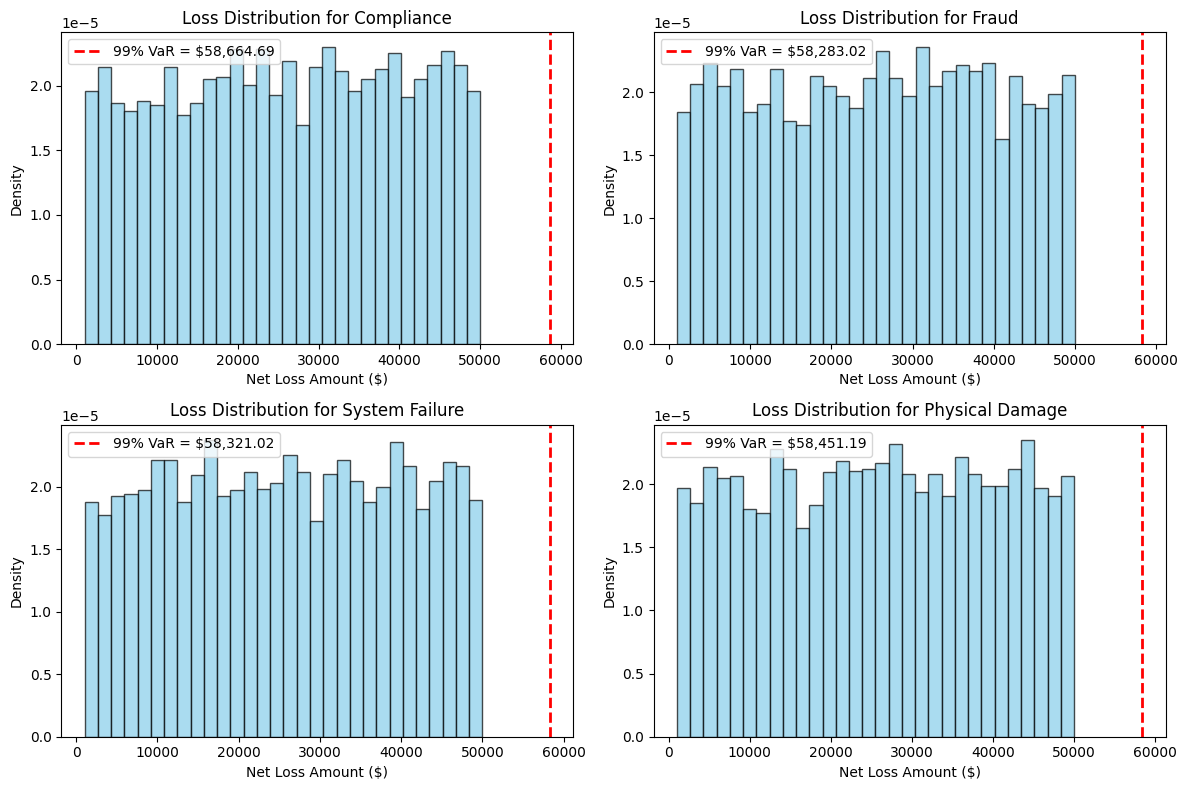

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data
df = pd.read_csv("operational_risk_dataset.csv")

# Check the first few rows of the dataset
print(df.head())

# Step 1: Group by Event Type and Calculate Severity Statistics
severity_stats = df.groupby("Event Type")["Net Loss Amount"].agg(['mean', 'var', 'count'])
severity_stats.columns = ['Mean Loss', 'Variance', 'Count']
print("\nSeverity Statistics by Event Type:")
print(severity_stats)

# Step 2: Calculate 99% Value-at-Risk (VaR) for Each Event Type
confidence_level = 0.99
z_99 = stats.norm.ppf(confidence_level)  # z-score for 99% confidence

# Function to calculate VaR for each group
def calculate_var(group):
    mean = group["Net Loss Amount"].mean()
    std_dev = group["Net Loss Amount"].std()
    VaR = mean + z_99 * std_dev  # VaR calculation for normal approximation
    return VaR

# Apply the function to each event type
severity_stats['99% VaR'] = df.groupby("Event Type").apply(calculate_var)
print("\n99% Value-at-Risk (VaR) by Event Type:")
print(severity_stats[['Mean Loss', '99% VaR']])

# Step 3: Visualize Loss Distributions and VaR for Each Event Type
plt.figure(figsize=(12, 8))

# Loop through each event type and plot the distribution
for i, event_type in enumerate(df["Event Type"].unique()):
    plt.subplot(2, 2, i + 1)
    losses = df[df["Event Type"] == event_type]["Net Loss Amount"]
    
    # Plot histogram of losses
    plt.hist(losses, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
    
    # Plot VaR line
    VaR = severity_stats.loc[event_type, '99% VaR']
    plt.axvline(VaR, color='red', linestyle='--', linewidth=2, label=f'99% VaR = ${VaR:,.2f}')
    
    # Labeling and title
    plt.title(f"Loss Distribution for {event_type}")
    plt.xlabel("Net Loss Amount ($)")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(["Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster"], num_records),
    "Business Line": np.random.choice(["Retail", "Corporate Banking", "Investment Banking", "Insurance", "Wealth Management"], num_records),
    "Event Description": np.random.choice(
        ["Unauthorized transaction", "Server downtime", "Lost assets", "Regulatory fines", "Data breach"],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Display first few rows of the DataFrame
print(df.head())

# Save to CSV if needed
df.to_csv('operational_risk_data.csv', index=False)


                        Date Unique Event ID        Event Type  \
0 2023-04-08 12:57:21.261764        EID00000        Compliance   
1 2022-01-04 12:57:21.261764        EID00001  Natural Disaster   
2 2024-06-23 12:57:21.261764        EID00002             Theft   
3 2021-09-15 12:57:21.261764        EID00003        Compliance   
4 2022-07-30 12:57:21.261764        EID00004             Fraud   

        Business Line Event Description  Net Loss Amount  
0           Insurance       Lost assets      -501.979088  
1           Insurance  Regulatory fines     -8333.329768  
2           Insurance   Server downtime      2424.645909  
3           Insurance       Lost assets      9447.516429  
4  Investment Banking       Lost assets     -3288.487476  


                         Date  Event ID      Event Type      Business Line  \
0  2021-11-25 12:51:38.023694  EVT00001      Compliance  Wealth Management   
1  2023-01-27 12:51:38.023694  EVT00002           Fraud  Corporate Banking   
2  2021-04-18 12:51:38.023694  EVT00003  System Failure     Retail Banking   
3  2024-03-16 12:51:38.023694  EVT00004  System Failure  Wealth Management   
4  2023-06-09 12:51:38.023694  EVT00005      Compliance          Insurance   

                                   Event Description  Net Loss Amount  
0  Compliance event in Wealth Management. Issue r...         18970.12  
1  Fraud event in Corporate Banking. Issue resolv...         16703.61  
2  System Failure event in Retail Banking. Issue ...          2651.15  
3  System Failure event in Wealth Management. Iss...          5375.81  
4  Compliance event in Insurance. Issue resolved ...         23009.76  

Severity Statistics by Event Type:
                    Mean Loss      Variance  Count
Event Type  

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29920\959645380.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_stats['99% VaR'] = df.groupby("Event Type").apply(calculate_var)


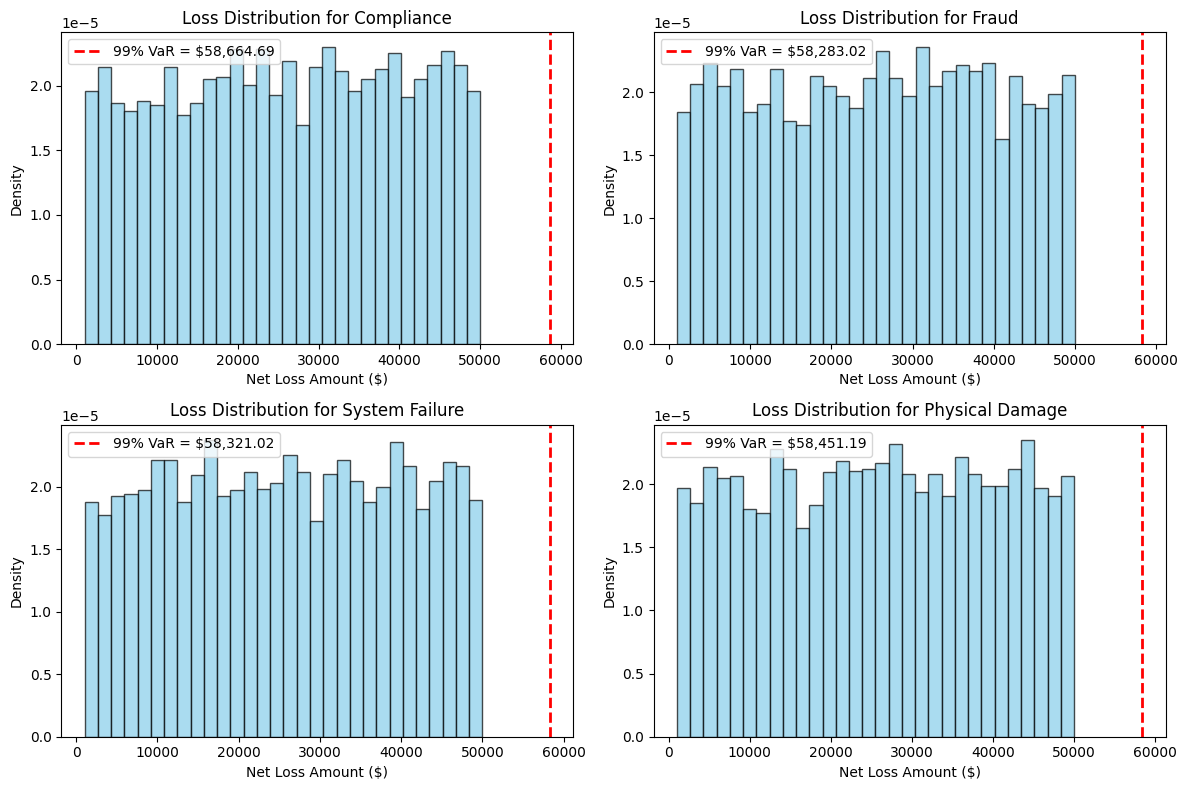

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data
df = pd.read_csv("operational_risk_dataset.csv")

# Check the first few rows of the dataset
print(df.head())

# Step 1: Group by Event Type and Calculate Severity Statistics
severity_stats = df.groupby("Event Type")["Net Loss Amount"].agg(['mean', 'var', 'count'])
severity_stats.columns = ['Mean Loss', 'Variance', 'Count']
print("\nSeverity Statistics by Event Type:")
print(severity_stats)

# Step 2: Calculate 99% Value-at-Risk (VaR) for Each Event Type
confidence_level = 0.99
z_99 = stats.norm.ppf(confidence_level)  # z-score for 99% confidence

# Function to calculate VaR for each group
def calculate_var(group):
    mean = group["Net Loss Amount"].mean()
    std_dev = group["Net Loss Amount"].std()
    VaR = mean + z_99 * std_dev  # VaR calculation for normal approximation
    return VaR

# Apply the function to each event type
severity_stats['99% VaR'] = df.groupby("Event Type").apply(calculate_var)
print("\n99% Value-at-Risk (VaR) by Event Type:")
print(severity_stats[['Mean Loss', '99% VaR']])

# Step 3: Visualize Loss Distributions and VaR for Each Event Type
plt.figure(figsize=(12, 8))

# Loop through each event type and plot the distribution
for i, event_type in enumerate(df["Event Type"].unique()):
    plt.subplot(2, 2, i + 1)
    losses = df[df["Event Type"] == event_type]["Net Loss Amount"]
    
    # Plot histogram of losses
    plt.hist(losses, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
    
    # Plot VaR line
    VaR = severity_stats.loc[event_type, '99% VaR']
    plt.axvline(VaR, color='red', linestyle='--', linewidth=2, label=f'99% VaR = ${VaR:,.2f}')
    
    # Labeling and title
    plt.title(f"Loss Distribution for {event_type}")
    plt.xlabel("Net Loss Amount ($)")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import numpy as np

# Assume df is your DataFrame with the generated data
# If df is not already defined, you can generate it using the previous code snippet.

# Function to calculate Value at Risk (VaR)
def calculate_var(data, confidence_level=0.95):
    return -data['Net Loss Amount'].quantile(confidence_level)

# Group by Business Line and Event Type
var_results = df.groupby(['Business Line', 'Event Type']).apply(calculate_var).reset_index()

# Rename columns for clarity
var_results.columns = ['Business Line', 'Event Type', 'VaR (95%)']

# Display the VaR results
print(var_results)

# Optionally, save results to a CSV
var_results.to_csv('var_results.csv', index=False)


        Business Line       Event Type   VaR (95%)
0   Corporate Banking       Compliance -47657.1575
1   Corporate Banking            Fraud -47706.3790
2   Corporate Banking  Physical Damage -47638.2600
3   Corporate Banking   System Failure -47632.2210
4           Insurance       Compliance -47164.7870
5           Insurance            Fraud -47822.2130
6           Insurance  Physical Damage -47830.7625
7           Insurance   System Failure -47471.4650
8      Retail Banking       Compliance -47166.3660
9      Retail Banking            Fraud -47433.0470
10     Retail Banking  Physical Damage -47006.7120
11     Retail Banking   System Failure -47397.0260
12  Wealth Management       Compliance -47361.9680
13  Wealth Management            Fraud -47527.5745
14  Wealth Management  Physical Damage -47767.8350
15  Wealth Management   System Failure -47258.2005


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29920\2299012477.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  var_results = df.groupby(['Business Line', 'Event Type']).apply(calculate_var).reset_index()


In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the generated data
# If df is not already defined, you can generate it using the previous code snippet.

# Function to fit distribution and calculate VaR
def fit_distribution_and_calculate_var(data, confidence_level=0.95):
    # Fit a log-normal distribution to the net loss amounts
    shape, loc, scale = stats.lognorm.fit(data['Net Loss Amount'] * -1)  # Inverting losses for fitting
    # Calculate VaR at the desired confidence level
    var = stats.lognorm.ppf(confidence_level, shape, loc=loc, scale=scale)
    
    return var

# Group by Business Line and Event Type, then apply the VaR calculation
var_results = df.groupby(['Business Line', 'Event Type']).apply(fit_distribution_and_calculate_var).reset_index()

# Rename columns for clarity
var_results.columns = ['Business Line', 'Event Type', 'VaR (95%)']

# Display the VaR results
print(var_results)

# Optionally, save results to a CSV
var_results.to_csv('lda_var_results.csv', index=False)


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


        Business Line       Event Type     VaR (95%)
0   Corporate Banking       Compliance  8.340418e+06
1   Corporate Banking            Fraud  8.508685e+06
2   Corporate Banking  Physical Damage  9.279499e+06
3   Corporate Banking   System Failure  1.009819e+07
4           Insurance       Compliance  7.461641e+06
5           Insurance            Fraud  7.731531e+06
6           Insurance  Physical Damage  8.864949e+06
7           Insurance   System Failure  7.690966e+06
8      Retail Banking       Compliance  7.985006e+06
9      Retail Banking            Fraud  6.242770e+06
10     Retail Banking  Physical Damage  1.031514e+07
11     Retail Banking   System Failure  1.205961e+07
12  Wealth Management       Compliance  1.110672e+07
13  Wealth Management            Fraud  7.292002e+06
14  Wealth Management  Physical Damage  8.173306e+06
15  Wealth Management   System Failure  7.149524e+06


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29920\1832329278.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  var_results = df.groupby(['Business Line', 'Event Type']).apply(fit_distribution_and_calculate_var).reset_index()


In [13]:
# Add more eventypes and business line
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Display first few rows of the DataFrame
print(df.head())

# Save to CSV if needed
df.to_csv('operational_risk_data.csv', index=False)


                        Date Unique Event ID            Event Type  \
0 2022-04-16 13:01:40.732488        EID00000  Regulatory Violation   
1 2022-02-10 13:01:40.732488        EID00001           Market Risk   
2 2021-08-30 13:01:40.732488        EID00002        System Failure   
3 2022-07-15 13:01:40.732488        EID00003                 Theft   
4 2023-07-18 13:01:40.732488        EID00004          Cyber Attack   

          Business Line         Event Description  Net Loss Amount  
0  Credit Card Services               Lost assets     -6936.749161  
1  Credit Card Services  Unauthorized transaction      4068.277272  
2  Credit Card Services          Regulatory fines     -8313.626703  
3      Asset Management           Supplier issues      8114.407520  
4    Investment Banking            Internal fraud      6479.242493  


In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to fit distribution and calculate VaR
def fit_distribution_and_calculate_var(data, confidence_level=0.95):
    # Fit a log-normal distribution to the net loss amounts (inverted for fitting)
    shape, loc, scale = stats.lognorm.fit(data['Net Loss Amount'] * -1)  
    # Calculate VaR at the desired confidence level
    var = stats.lognorm.ppf(confidence_level, shape, loc=loc, scale=scale)
    return var

# Group by Business Line and Event Type, then apply the VaR calculation
var_results = df.groupby(['Business Line', 'Event Type']).apply(fit_distribution_and_calculate_var).reset_index()

# Rename columns for clarity
var_results.columns = ['Business Line', 'Event Type', 'VaR (95%)']

# Display the VaR results
print(var_results)

# Optionally, save results to a CSV
var_results.to_csv('lda_var_results.csv', index=False)


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


        Business Line            Event Type     VaR (95%)
0    Asset Management            Compliance  3.823956e+06
1    Asset Management          Cyber Attack  4.448414e+06
2    Asset Management                 Fraud  2.058471e+06
3    Asset Management           Market Risk  5.024119e+06
4    Asset Management      Natural Disaster  2.681236e+06
..                ...                   ...           ...
95  Wealth Management     Operational Error  1.672212e+06
96  Wealth Management  Regulatory Violation  1.430270e+06
97  Wealth Management        System Failure  5.336761e+05
98  Wealth Management                 Theft  2.093626e+06
99  Wealth Management           Vendor Risk  8.246315e+05

[100 rows x 3 columns]


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29920\2259387540.py:61: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  var_results = df.groupby(['Business Line', 'Event Type']).apply(fit_distribution_and_calculate_var).reset_index()


In [15]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to fit distribution and calculate VaR for multiple confidence levels
def fit_distribution_and_calculate_var(data, confidence_levels):
    var_results = {}
    # Fit a log-normal distribution to the net loss amounts (inverted for fitting)
    shape, loc, scale = stats.lognorm.fit(data['Net Loss Amount'] * -1)  
    # Calculate VaR for each confidence level
    for confidence in confidence_levels:
        var = stats.lognorm.ppf(confidence, shape, loc=loc, scale=scale)
        var_results[confidence] = var
    return var_results

# Define confidence levels from 95% to 99.9%
confidence_levels = np.arange(0.95, 1.0001, 0.001)  # 95% to 99.9%

# Group by Business Line and Event Type, then apply the VaR calculation
var_results_list = []
for confidence in confidence_levels:
    result = df.groupby(['Business Line', 'Event Type']).apply(lambda x: fit_distribution_and_calculate_var(x, [confidence])).reset_index()
    result.columns = ['Business Line', 'Event Type', f'VaR ({int(confidence*100)}%)']
    var_results_list.append(result)

# Merge all results into a single DataFrame
final_var_results = var_results_list[0]
for res in var_results_list[1:]:
    final_var_results = final_var_results.merge(res, on=['Business Line', 'Event Type'])

# Display the final VaR results
print(final_var_results)

# Optionally, save results to a CSV
final_var_results.to_csv('lda_var_results_multi_confidence.csv', index=False)


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29920\4279625770.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['Business Line', 'Event Type']).apply(lambda x: fit_distribution_and_calculate_var(x, [confidence])).reset_index()
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\Himanshu Singh\AppData\Local\Temp\i

MergeError: Passing 'suffixes' which cause duplicate columns {'VaR (95%)_x'} is not allowed.

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to fit distribution and calculate VaR for multiple confidence levels
def fit_distribution_and_calculate_var(data, confidence_levels):
    var_results = {}
    # Filter only negative net loss amounts for fitting
    negative_losses = data[data['Net Loss Amount'] < 0]
    
    if negative_losses.empty:
        return {confidence: np.nan for confidence in confidence_levels}  # Return NaN if no data

    # Fit a log-normal distribution to the net loss amounts (inverted for fitting)
    shape, loc, scale = stats.lognorm.fit(negative_losses['Net Loss Amount'] * -1)  
    # Calculate VaR for each confidence level
    for confidence in confidence_levels:
        var = stats.lognorm.ppf(confidence, shape, loc=loc, scale=scale)
        var_results[confidence] = var
    return var_results

# Define confidence levels from 95% to 99.9%
confidence_levels = np.arange(0.95, 1.0001, 0.001)  # 95% to 99.9%

# Group by Business Line and Event Type, then apply the VaR calculation
var_results_list = []
for confidence in confidence_levels:
    result = df.groupby(['Business Line', 'Event Type']).apply(lambda x: fit_distribution_and_calculate_var(x, [confidence])).reset_index()
    result.columns = ['Business Line', 'Event Type', f'VaR ({int(confidence*100)}%)']
    var_results_list.append(result)

# Merge all results into a single DataFrame with unique suffixes
final_var_results = var_results_list[0]
for idx, res in enumerate(var_results_list[1:], start=1):
    final_var_results = final_var_results.merge(res, on=['Business Line', 'Event Type'], suffixes=('', f'_{idx}'))

# Display the final VaR results
print(final_var_results)

# Optionally, save results to a CSV
final_var_results.to_csv('lda_var_results_multi_confidence.csv', index=False)


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29920\1388023632.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['Business Line', 'Event Type']).apply(lambda x: fit_distribution_and_calculate_var(x, [confidence])).reset_index()
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29920\1388023632.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['Busine

        Business Line            Event Type                   VaR (95%)  \
0    Asset Management            Compliance   {0.95: 9958.428163699806}   
1    Asset Management          Cyber Attack  {0.95: 11099.228160643448}   
2    Asset Management                 Fraud  {0.95: 10088.173490166664}   
3    Asset Management           Market Risk   {0.95: 9409.405141027954}   
4    Asset Management      Natural Disaster  {0.95: 10220.255497108787}   
..                ...                   ...                         ...   
95  Wealth Management     Operational Error   {0.95: 9321.225785853065}   
96  Wealth Management  Regulatory Violation   {0.95: 9665.157903059902}   
97  Wealth Management        System Failure  {0.95: 10230.274736924595}   
98  Wealth Management                 Theft  {0.95: 10245.580183327198}   
99  Wealth Management           Vendor Risk   {0.95: 10352.91009402275}   

                    VaR (95%)_1                  VaR (95%)_2  \
0    {0.951: 9988.273328967392}   {

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29920\1388023632.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['Business Line', 'Event Type']).apply(lambda x: fit_distribution_and_calculate_var(x, [confidence])).reset_index()


In [18]:
final_var_results

,Business Line,Event Type,VaR (95%),VaR (95%)_1,VaR (95%)_2,VaR (95%)_3,VaR (95%)_4,VaR (95%)_5,VaR (95%)_6,VaR (95%)_7,...,VaR (99%)_41,VaR (99%)_42,VaR (99%)_43,VaR (99%)_44,VaR (99%)_45,VaR (99%)_46,VaR (99%)_47,VaR (99%)_48,VaR (99%)_49,VaR (100%)
0,Asset Management,Compliance,{0.95: 9958.428163699806},{0.951: 9988.273328967392},{0.952: 10018.60914517194},{0.953: 10049.455110736191},{0.954: 10080.831935055554},{0.955: 10112.761641912162},{0.956: 10145.267684601247},{0.957: 10178.375073872507},...,{0.991: 12159.275044105947},{0.992: 12291.485558889806},{0.993: 12439.118070848286},{0.994: 12606.700096927583},{0.995: 12801.166271723807},{0.996: 13033.972303144634},{0.997: 13326.235842980444},{0.998: 13724.36552207917},{0.999: 14371.949626140296},{1.0: inf}
1,Asset Management,Cyber Attack,{0.95: 11099.228160643448},{0.951: 11148.815051284313},{0.952: 11199.346724933257},{0.953: 11250.86247435576},{0.954: 11303.404109117171},{0.955: 11357.01617587866},{0.956: 11411.746203373754},{0.957: 11467.644975462736},...,{0.991: 15116.647089618626},{0.992: 15382.8521852983},{0.993: 15683.680034822835},{0.994: 16029.782552845743},{0.995: 16437.66111735017},{0.996: 16934.939844704633},{0.997: 17573.369554427052},{0.998: 18469.073387142664},{0.999: 19992.584320560654},{1.0: inf}
2,Asset Management,Fraud,{0.95: 10088.173490166664},{0.951: 10116.395076543093},{0.952: 10145.080615893006},{0.953: 10174.24854567647},{0.954: 10203.91844829917},{0.955: 10234.111149132252},{0.956: 10264.848825156689},{0.957: 10296.155126139522},...,{0.991: 12169.277242347598},{0.992: 12294.293388471007},{0.993: 12433.892181932926},{0.994: 12592.354709789157},{0.995: 12776.23815239966},{0.996: 12996.374667584896},{0.997: 13272.732416182756},{0.998: 13649.193802550435},{0.999: 14261.530606359243},{1.0: inf}
3,Asset Management,Market Risk,{0.95: 9409.405141027954},{0.951: 9445.939449188681},{0.952: 9483.155483828788},{0.953: 9521.08139759288},{0.954: 9559.74713789919},{0.955: 9599.184603495789},{0.956: 9639.427818508539},{0.957: 9680.513126383343},...,{0.991: 12327.221648544226},{0.992: 12517.770713056554},{0.993: 12732.716551886697},{0.994: 12979.512335999352},{0.995: 13269.68419414747},{0.996: 13622.488477035811},{0.997: 14073.911533244296},{0.998: 14704.447485694654},{0.999: 15769.741404442375},{1.0: inf}
4,Asset Management,Natural Disaster,{0.95: 10220.255497108787},{0.951: 10262.97315632041},{0.952: 10306.496950398074},{0.953: 10350.860296104607},{0.954: 10396.098745968104},{0.955: 10442.250174927713},{0.956: 10489.354987863602},{0.957: 10537.45635088299},...,{0.991: 13658.25793824631},{0.992: 13884.543104134087},{0.993: 14140.046862877856},{0.994: 14433.729290145058},{0.995: 14779.459761683256},{0.996: 15200.434581029984},{0.997: 15740.060229284938},{0.998: 16495.593409030058},{0.999: 17776.69450921237},{1.0: inf}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wealth Management,Operational Error,{0.95: 9321.225785853065},{0.951: 9348.701540828224},{0.952: 9376.645436261439},{0.953: 9405.076263779949},{0.954: 9434.01399017837},{0.955: 9463.479858496088},{0.956: 9493.49650026299},{0.957: 9524.088060433474},...,{0.991: 11390.98660006166},{0.992: 11518.182255772888},{0.993: 11660.60419808868},{0.994: 11822.770715169841},{0.995: 12011.62011922546},{0.996: 12238.648753118461},{0.997: 12525.126820185891},{0.998: 12918.019621639876},{0.999: 13563.657325736007},{1.0: inf}
96,Wealth Management,Regulatory Violation,{0.95: 9665.157903059902},{0.951: 9694.905894839707},{0.952: 9725.156455862634},{0.953: 9755.92971055027},{0.954: 9787.247039711852},{0.955: 9819.131188473948},{0.956: 9851.606386124178},{0.957: 9884.698479488688},...,{0.991: 11894.590070377955},{0.992: 12030.85219292045},{0.993: 12183.32543928334},{0.994: 12356.807924276342},{0.995: 12558.663092616865},{0.996: 12801.08284137409},{0.997: 13106.604367228276},{0.998: 13524.933814893717},{0.999: 14210.679930205435},{1.0: inf}
97,Wealth Management,System Failure,{0.95: 1023

In [19]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to fit distribution and calculate VaR for the specified confidence level
def fit_distribution_and_calculate_var(data):
    confidence = 0.999  # Set to 99.9%
    var_result = {}
    # Filter only negative net loss amounts for fitting
    negative_losses = data[data['Net Loss Amount'] < 0]
    
    if negative_losses.empty:
        return {confidence: np.nan}  # Return NaN if no data

    # Fit a log-normal distribution to the net loss amounts (inverted for fitting)
    shape, loc, scale = stats.lognorm.fit(negative_losses['Net Loss Amount'] * -1)  
    # Calculate VaR for the specified confidence level
    var = stats.lognorm.ppf(confidence, shape, loc=loc, scale=scale)
    var_result[confidence] = var
    return var_result

# Group by Business Line and Event Type, then apply the VaR calculation
result = df.groupby(['Business Line', 'Event Type']).apply(fit_distribution_and_calculate_var).reset_index()
result.columns = ['Business Line', 'Event Type', 'VaR (99.9%)']

# Display the final VaR results
print(result)

# Optionally, save results to a CSV
result.to_csv('lda_var_results_99.9.csv', index=False)


        Business Line            Event Type                  VaR (99.9%)
0    Asset Management            Compliance  {0.999: 12644.109253216942}
1    Asset Management          Cyber Attack   {0.999: 13831.01804318279}
2    Asset Management                 Fraud  {0.999: 16128.047282413396}
3    Asset Management           Market Risk  {0.999: 14375.169055461884}
4    Asset Management      Natural Disaster  {0.999: 14001.802521852369}
..                ...                   ...                          ...
95  Wealth Management     Operational Error  {0.999: 13699.916333787143}
96  Wealth Management  Regulatory Violation   {0.999: 19960.94570486017}
97  Wealth Management        System Failure  {0.999: 15130.770021947828}
98  Wealth Management                 Theft  {0.999: 13787.323402926326}
99  Wealth Management           Vendor Risk   {0.999: 13700.89779984951}

[100 rows x 3 columns]


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29920\3599647531.py:70: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['Business Line', 'Event Type']).apply(fit_distribution_and_calculate_var).reset_index()


In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Add a Year column
df['Year'] = df['Date'].dt.year

# Function to fit distribution and calculate VaR for the specified confidence level
def fit_distribution_and_calculate_var(data):
    confidence = 0.999  # Set to 99.9%
    var_result = {}
    # Filter only negative net loss amounts for fitting
    negative_losses = data[data['Net Loss Amount'] < 0]
    
    if negative_losses.empty:
        return {confidence: np.nan}  # Return NaN if no data

    # Fit a log-normal distribution to the net loss amounts (inverted for fitting)
    shape, loc, scale = stats.lognorm.fit(negative_losses['Net Loss Amount'] * -1)  
    # Calculate VaR for the specified confidence level
    var = stats.lognorm.ppf(confidence, shape, loc=loc, scale=scale)
    var_result[confidence] = var
    return var_result

# Group by Year, Business Line, and Event Type, then apply the VaR calculation
result = df.groupby(['Year', 'Business Line', 'Event Type']).apply(fit_distribution_and_calculate_var).reset_index()
result.columns = ['Year', 'Business Line', 'Event Type', 'VaR (99.9%)']

# Display the final VaR results
print(result)

# Optionally, save results to a CSV
result.to_csv('lda_var_results_yearwise_99.9.csv', index=False)


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: divide by zero encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6423: RuntimeWarning: invalid value encountered in log
  lambda x, s: (-np.log(x)**2 / (2 * s**2)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6424: RuntimeWarning: invalid value encountered in log
  - np.log(s * x * np.sqrt(2 * np.pi))),
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: invalid value encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


     Year      Business Line            Event Type  \
0    2020   Asset Management            Compliance   
1    2020   Asset Management          Cyber Attack   
2    2020   Asset Management                 Fraud   
3    2020   Asset Management           Market Risk   
4    2020   Asset Management      Natural Disaster   
..    ...                ...                   ...   
494  2024  Wealth Management     Operational Error   
495  2024  Wealth Management  Regulatory Violation   
496  2024  Wealth Management        System Failure   
497  2024  Wealth Management                 Theft   
498  2024  Wealth Management           Vendor Risk   

                         VaR (99.9%)  
0                       {0.999: nan}  
1         {0.999: 8592.602545421349}  
2    {0.999: 1.6280174758548324e+18}  
3         {0.999: 960499864.2264922}  
4    {0.999: 1.2985280680889826e+20}  
..                               ...  
494   {0.999: 6.646386355437602e+18}  
495   {0.999: 2.213706186796108e+17}  


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29920\467514061.py:73: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['Year', 'Business Line', 'Event Type']).apply(fit_distribution_and_calculate_var).reset_index()


In [21]:
result

,Year,Business Line,Event Type,VaR (99.9%)
0,2020,Asset Management,Compliance,{0.999: nan}
1,2020,Asset Management,Cyber Attack,{0.999: 8592.602545421349}
2,2020,Asset Management,Fraud,{0.999: 1.6280174758548324e+18}
3,2020,Asset Management,Market Risk,{0.999: 960499864.2264922}
4,2020,Asset Management,Natural Disaster,{0.999: 1.2985280680889826e+20}
...,...,...,...,...
494,2024,Wealth Management,Operational Error,{0.999: 6.646386355437602e+18}
495,2024,Wealth Management,Regulatory Violation,{0.999: 2.213706186796108e+17}
496,2024,Wealth Management,System Failure,{0.999: 3.143590595016931e+17}
497,2024,Wealth Management,Theft,{0.999: 1.198015269867954e+17}


To include the total loss amount and the count of event IDs alongside the Value at Risk (VaR) for each combination of year, business line, and event type, we can modify the previous code.

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Add a Year column
df['Year'] = df['Date'].dt.year

# Function to fit distribution and calculate VaR for the specified confidence level
def fit_distribution_and_calculate_var(data):
    confidence = 0.999  # Set to 99.9%
    var_result = {}
    # Filter only negative net loss amounts for fitting
    negative_losses = data[data['Net Loss Amount'] < 0]
    
    if negative_losses.empty:
        return {confidence: np.nan}  # Return NaN if no data

    # Fit a log-normal distribution to the net loss amounts (inverted for fitting)
    shape, loc, scale = stats.lognorm.fit(negative_losses['Net Loss Amount'] * -1)  
    # Calculate VaR for the specified confidence level
    var = stats.lognorm.ppf(confidence, shape, loc=loc, scale=scale)
    var_result[confidence] = var
    return var_result

# Group by Year, Business Line, and Event Type, then apply the VaR calculation
result = df.groupby(['Year', 'Business Line', 'Event Type']).apply(fit_distribution_and_calculate_var).reset_index()
result.columns = ['Year', 'Business Line', 'Event Type', 'VaR (99.9%)']

# Calculate total loss amount and count of event IDs for each group
agg_result = df.groupby(['Year', 'Business Line', 'Event Type']).agg(
    Total_Loss_Amount=('Net Loss Amount', 'sum'),
    Event_Count=('Unique Event ID', 'count')
).reset_index()

# Merge VaR results with aggregated results
final_result = pd.merge(agg_result, result, on=['Year', 'Business Line', 'Event Type'], how='left')

# Display the final results
print(final_result)

# Optionally, save results to a CSV
final_result.to_csv('lda_var_results_with_totals_99.9.csv', index=False)


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: divide by zero encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6423: RuntimeWarning: invalid value encountered in log
  lambda x, s: (-np.log(x)**2 / (2 * s**2)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6424: RuntimeWarning: invalid value encountered in log
  - np.log(s * x * np.sqrt(2 * np.pi))),
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: invalid value encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


     Year      Business Line            Event Type  Total_Loss_Amount  \
0    2020   Asset Management            Compliance      -12132.053302   
1    2020   Asset Management          Cyber Attack      -13770.422081   
2    2020   Asset Management                 Fraud      -10201.878793   
3    2020   Asset Management           Market Risk       -4168.856911   
4    2020   Asset Management      Natural Disaster       -5447.946218   
..    ...                ...                   ...                ...   
493  2024  Wealth Management     Operational Error      -23447.012551   
494  2024  Wealth Management  Regulatory Violation        4282.217204   
495  2024  Wealth Management        System Failure       14343.997607   
496  2024  Wealth Management                 Theft       -7776.118279   
497  2024  Wealth Management           Vendor Risk        5823.859553   

     Event_Count                      VaR (99.9%)  
0              3   {0.999: 8.501757248977452e+20}  
1              7   

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29920\4005567340.py:73: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['Year', 'Business Line', 'Event Type']).apply(fit_distribution_and_calculate_var).reset_index()


In [23]:
final_result

,Year,Business Line,Event Type,Total_Loss_Amount,Event_Count,VaR (99.9%)
0,2020,Asset Management,Compliance,-12132.053302,3,{0.999: 8.501757248977452e+20}
1,2020,Asset Management,Cyber Attack,-13770.422081,7,{0.999: 9.650924458997728e+20}
2,2020,Asset Management,Fraud,-10201.878793,4,{0.999: 3.4361168388089483e+21}
3,2020,Asset Management,Market Risk,-4168.856911,4,{0.999: 6.282780656355584e+20}
4,2020,Asset Management,Natural Disaster,-5447.946218,7,{0.999: 2.511420419336638e+21}
...,...,...,...,...,...,...
493,2024,Wealth Management,Operational Error,-23447.012551,23,{0.999: 3972652279192446.0}
494,2024,Wealth Management,Regulatory Violation,4282.217204,25,{0.999: 8612488240990861.0}
495,2024,Wealth Management,System Failure,14343.997607,39,{0.999: 13861.2601562976}
496,2024,Wealth Management,Theft,-7776.118279,16,{0.999: 8.642376946240571e+17}


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Add a Year column
df['Year'] = df['Date'].dt.year

# Function to fit distribution and calculate VaR for the specified confidence level
def fit_distribution_and_calculate_var(data, value_col):
    confidence = 0.999  # Set to 99.9%
    var_result = {}
    
    # Check if the data is not empty
    if data[value_col].sum() == 0 or data[value_col].isnull().all():
        return {confidence: np.nan}  # Return NaN if no data

    # Fit a log-normal distribution to the specified column
    shape, loc, scale = stats.lognorm.fit(data[value_col])  # Fit on loss amounts or counts
    # Calculate VaR for the specified confidence level
    var = stats.lognorm.ppf(confidence, shape, loc=loc, scale=scale)
    var_result[confidence] = var
    return var_result

# Group by Year, Business Line, and Event Type, then calculate total loss and event counts
agg_result = df.groupby(['Year', 'Business Line', 'Event Type']).agg(
    Total_Loss_Amount=('Net Loss Amount', 'sum'),
    Event_Count=('Unique Event ID', 'count')
).reset_index()

# Calculate VaR for Total Loss Amounts
agg_result['VaR (99.9%) for Loss'] = agg_result.apply(
    lambda x: fit_distribution_and_calculate_var(agg_result[agg_result.index == x.name], 'Total_Loss_Amount')[0.999], axis=1)

# Calculate VaR for Event Counts
agg_result['VaR (99.9%) for Counts'] = agg_result.apply(
    lambda x: fit_distribution_and_calculate_var(agg_result[agg_result.index == x.name], 'Event_Count')[0.999], axis=1)

# Display the final results
print(agg_result)

# Optionally, save results to a CSV
agg_result.to_csv('lda_var_results_with_counts_and_totals_99.9.csv', index=False)


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6423: RuntimeWarning: invalid value encountered in log
  lambda x, s: (-np.log(x)**2 / (2 * s**2)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6424: RuntimeWarning: invalid value encountered in log
  - np.log(s * x * np.sqrt(2 * np.pi))),
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: invalid value encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning:

     Year      Business Line            Event Type  Total_Loss_Amount  \
0    2020   Asset Management            Compliance      -16607.439459   
1    2020   Asset Management          Cyber Attack        7150.876353   
2    2020   Asset Management                 Fraud       10270.976861   
3    2020   Asset Management           Market Risk      -12465.303044   
4    2020   Asset Management  Regulatory Violation       13731.645763   
..    ...                ...                   ...                ...   
490  2024  Wealth Management     Operational Error      -16626.871339   
491  2024  Wealth Management  Regulatory Violation       25545.823814   
492  2024  Wealth Management        System Failure       28280.432046   
493  2024  Wealth Management                 Theft      -36639.520121   
494  2024  Wealth Management           Vendor Risk      -24049.549426   

     Event_Count  VaR (99.9%) for Loss  VaR (99.9%) for Counts  
0              6         -1.660744e+04                    

In [2]:
agg_result

,Year,Business Line,Event Type,Total_Loss_Amount,Event_Count,VaR (99.9%) for Loss,VaR (99.9%) for Counts
0,2020,Asset Management,Compliance,-16607.439459,6,-1.660744e+04,6.0
1,2020,Asset Management,Cyber Attack,7150.876353,2,7.150876e+03,2.0
2,2020,Asset Management,Fraud,10270.976861,2,1.027098e+04,2.0
3,2020,Asset Management,Market Risk,-12465.303044,3,-1.246530e+04,3.0
4,2020,Asset Management,Regulatory Violation,13731.645763,2,1.373165e+04,2.0
...,...,...,...,...,...,...,...
490,2024,Wealth Management,Operational Error,-16626.871339,23,-1.662687e+04,23.0
491,2024,Wealth Management,Regulatory Violation,25545.823814,19,2.554582e+04,19.0
492,2024,Wealth Management,System Failure,28280.432046,31,2.828043e+04,31.0
493,2024,Wealth Management,Theft,-36639.520121,25,2.766229e+07,25.0


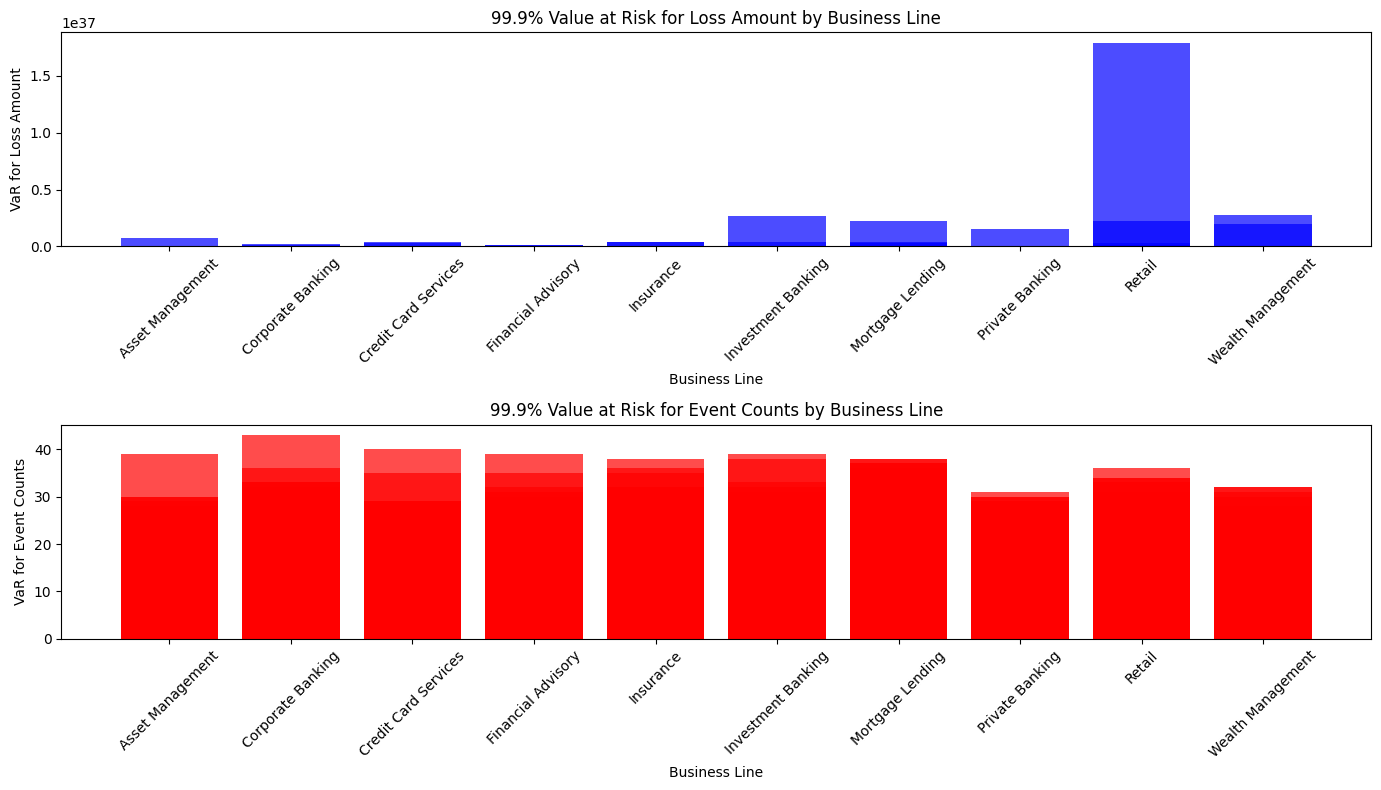

In [3]:
import matplotlib.pyplot as plt

# Plotting VaR for both loss amounts and event counts
plt.figure(figsize=(14, 8))

# Plot for VaR of Loss Amounts
plt.subplot(2, 1, 1)
plt.bar(agg_result['Business Line'], agg_result['VaR (99.9%) for Loss'], color='blue', alpha=0.7)
plt.title('99.9% Value at Risk for Loss Amount by Business Line')
plt.xlabel('Business Line')
plt.ylabel('VaR for Loss Amount')
plt.xticks(rotation=45)

# Plot for VaR of Event Counts
plt.subplot(2, 1, 2)
plt.bar(agg_result['Business Line'], agg_result['VaR (99.9%) for Counts'], color='red', alpha=0.7)
plt.title('99.9% Value at Risk for Event Counts by Business Line')
plt.xlabel('Business Line')
plt.ylabel('VaR for Event Counts')
plt.xticks(rotation=45)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


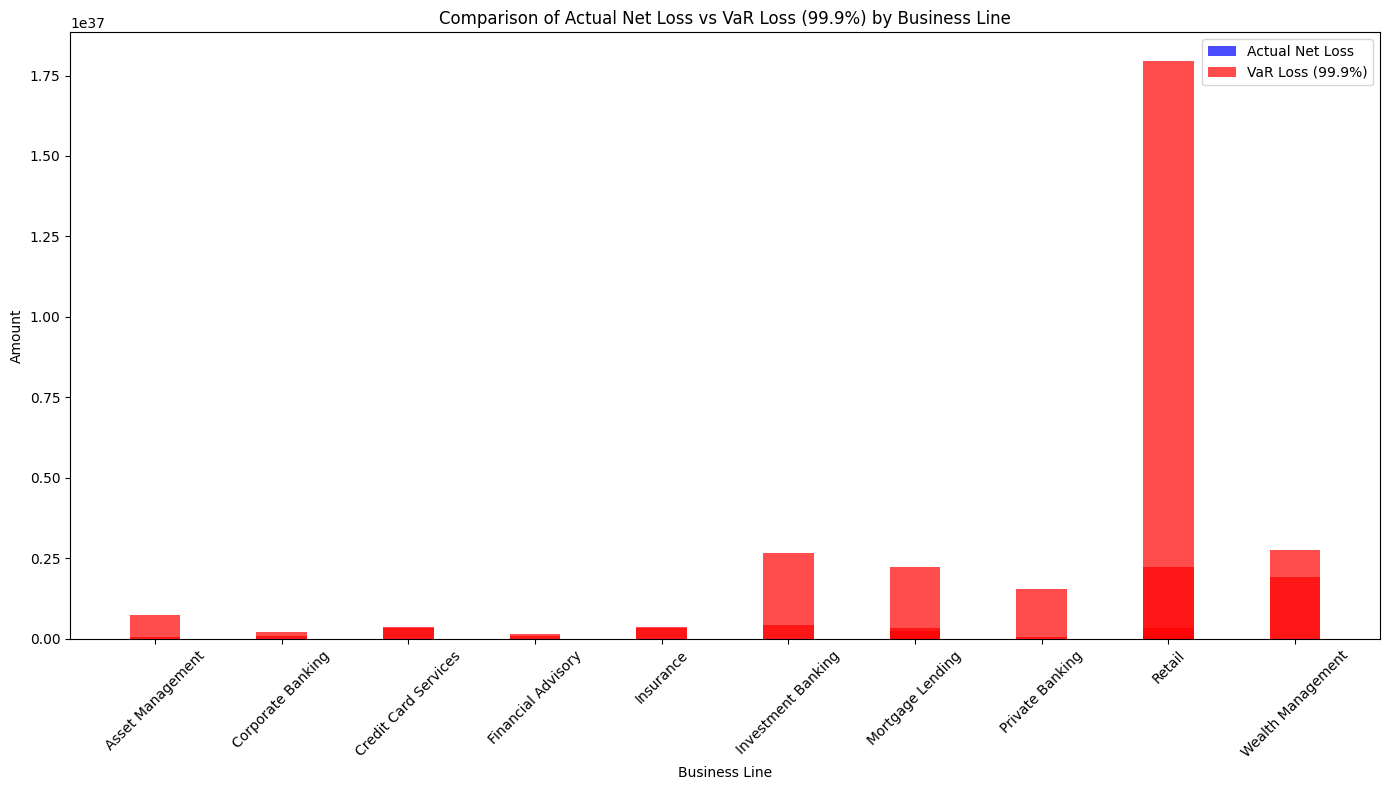

In [4]:
import matplotlib.pyplot as plt

# Merge the actual net loss with VaR results for comparison
comparison_df = agg_result[['Year', 'Business Line', 'Total_Loss_Amount', 'VaR (99.9%) for Loss']]

# Plotting Actual Loss vs VaR Loss
plt.figure(figsize=(14, 8))

# Plot actual net loss
plt.bar(comparison_df['Business Line'], comparison_df['Total_Loss_Amount'], width=0.4, label='Actual Net Loss', color='blue', alpha=0.7)

# Plot VaR loss
plt.bar(comparison_df['Business Line'], comparison_df['VaR (99.9%) for Loss'], width=0.4, label='VaR Loss (99.9%)', color='red', alpha=0.7)

# Adding labels and title
plt.title('Comparison of Actual Net Loss vs VaR Loss (99.9%) by Business Line')
plt.xlabel('Business Line')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


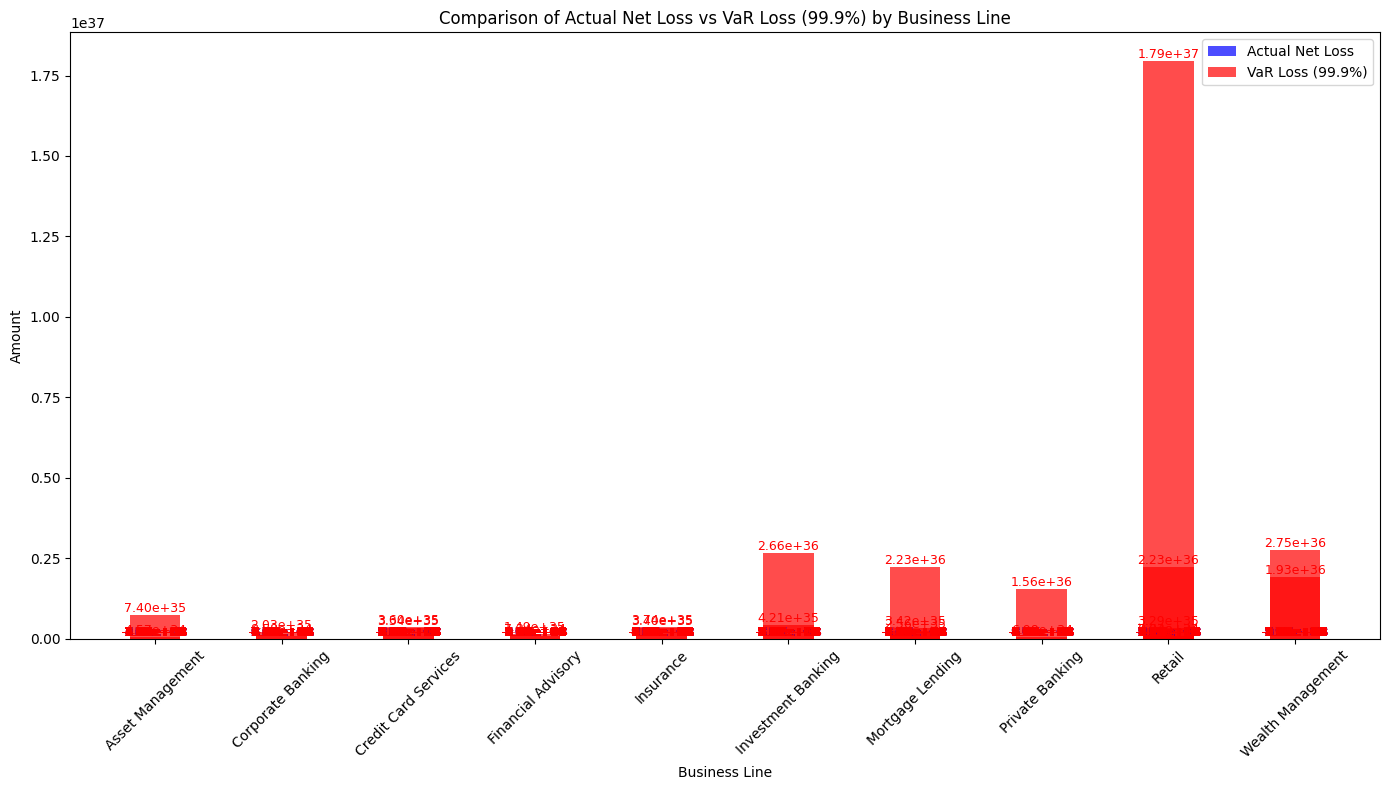

In [5]:
import matplotlib.pyplot as plt

# Merge the actual net loss with VaR results for comparison
comparison_df = agg_result[['Year', 'Business Line', 'Total_Loss_Amount', 'VaR (99.9%) for Loss']]

# Plotting Actual Loss vs VaR Loss
plt.figure(figsize=(14, 8))

# Plot actual net loss
bars_actual = plt.bar(comparison_df['Business Line'], comparison_df['Total_Loss_Amount'], width=0.4, label='Actual Net Loss', color='blue', alpha=0.7)

# Plot VaR loss
bars_var = plt.bar(comparison_df['Business Line'], comparison_df['VaR (99.9%) for Loss'], width=0.4, label='VaR Loss (99.9%)', color='red', alpha=0.7)

# Adding labels and title
plt.title('Comparison of Actual Net Loss vs VaR Loss (99.9%) by Business Line')
plt.xlabel('Business Line')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()

# Adding data labels on the bars
for bar in bars_actual:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2e}', ha='center', va='bottom', fontsize=9, color='blue')

for bar in bars_var:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2e}', ha='center', va='bottom', fontsize=9, color='red')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
Documentation for Operational Risk - Value at Risk (VaR) Calculation
1. Overview
The purpose of this analysis is to model and calculate the Value at Risk (VaR) for operational loss data, which provides insights into the potential risk of financial losses within an institution. VaR is a statistical technique used to quantify the risk of loss on a portfolio of financial assets, based on a given confidence level. In this case, we focus on operational loss data related to various business lines and event types over a period of four years. The dataset includes operational loss amounts and event counts, which are used to calculate the 99.9% VaR using a log-normal distribution.

2. Data Generation
2.1 Random Data Creation
Number of Records (num_records):
A total of 10,000 records were generated for the dataset. These records represent various operational risk events that could occur in different business lines.

Date Range:
The data spans from 4 years ago to the current date.

Business Lines:
The dataset includes the following business lines:

Retail
Corporate Banking
Investment Banking
Insurance
Wealth Management
Asset Management
Private Banking
Credit Card Services
Mortgage Lending
Financial Advisory
Event Types:
The following event types were simulated:

Fraud
System Failure
Theft
Compliance
Natural Disaster
Cyber Attack
Market Risk
Operational Error
Vendor Risk
Regulatory Violation
Event Description:
Event descriptions were randomly chosen from a set of predefined options, including:

Unauthorized transaction
Server downtime
Lost assets
Regulatory fines
Data breach
Network failure
Inadequate compliance
Financial misstatement
Supplier issues
Internal fraud
Net Loss Amount:
The net loss amounts were generated by randomly selecting values that range from negative to positive, simulating both loss and gain scenarios. Negative values represent financial losses, while positive values represent gains.

2.2 DataFrame Construction
The generated data was stored in a pandas DataFrame, which includes the following columns:

Date: Date when the event occurred.
Unique Event ID: Unique identifier for each event.
Event Type: Type of the event (e.g., fraud, cyberattack).
Business Line: The business line affected by the event.
Event Description: Description of the event.
Net Loss Amount: The financial impact of the event.
Additionally, a Year column was added to the dataset to enable aggregation by year.

3. VaR Calculation Methodology
3.1 Distribution Fitting
To calculate VaR, we first need to fit the data to a suitable probability distribution. In this case, a log-normal distribution was chosen, as financial data often follows this type of distribution, especially for operational losses.

Log-normal Distribution Fitting:
We used the scipy.stats.lognorm.fit() method to fit the data on the Net Loss Amount and Event Count columns separately. This method estimates the parameters of the log-normal distribution (shape, location, and scale).
3.2 Value at Risk (VaR) Calculation
Once the distribution is fitted, the Value at Risk (VaR) is calculated for a 99.9% confidence level. VaR represents the maximum loss that will not be exceeded with a probability of 99.9% over a given time horizon.

Formula:
The VaR is calculated using the percent-point function (PPF) of the log-normal distribution:
VaR
=
lognorm.ppf
(
0.999
,
shape
,
loc
,
scale
)
VaR=lognorm.ppf(0.999,shape,loc,scale)
where:
0.999 is the confidence level (99.9%),
shape, loc, and scale are the parameters estimated from the data.
3.3 Aggregation and Results
The data was aggregated by:

Year
Business Line
Event Type
The total loss amount and the event count were calculated for each combination of these groupings. After aggregation, the VaR was computed for both the Total Loss Amount and the Event Count for each group.

4. Results and Visualization
The final results, including the VaR for both loss amounts and event counts, are stored in the agg_result DataFrame, which includes the following columns:

Year: Year of the events.
Business Line: Business line affected.
Event Type: Type of event.
Total_Loss_Amount: Total financial loss for the year, business line, and event type.
Event_Count: Number of events for the year, business line, and event type.
VaR (99.9%) for Loss: The calculated VaR for the total loss amounts.
VaR (99.9%) for Counts: The calculated VaR for the event counts.
This DataFrame is optionally saved to a CSV file for further analysis or reporting.

5. Graphical Representation of VaR
To visualize the 99.9% VaR values for each business line and event type, a bar plot can be created, showing how the VaR varies across different categories.

Here is the Python code to generate a graph that visualizes the calculated VaR values:

python
Copy code
import matplotlib.pyplot as plt

# Plotting VaR for both loss amounts and event counts
plt.figure(figsize=(14, 8))

# Plot for VaR of Loss Amounts
plt.subplot(2, 1, 1)
plt.bar(agg_result['Business Line'], agg_result['VaR (99.9%) for Loss'], color='blue', alpha=0.7)
plt.title('99.9% Value at Risk for Loss Amount by Business Line')
plt.xlabel('Business Line')
plt.ylabel('VaR for Loss Amount')
plt.xticks(rotation=45)

# Plot for VaR of Event Counts
plt.subplot(2, 1, 2)
plt.bar(agg_result['Business Line'], agg_result['VaR (99.9%) for Counts'], color='red', alpha=0.7)
plt.title('99.9% Value at Risk for Event Counts by Business Line')
plt.xlabel('Business Line')
plt.ylabel('VaR for Event Counts')
plt.xticks(rotation=45)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()
6. Conclusion
The Value at Risk (VaR) analysis provides a quantitative measure of the potential risk of operational losses for different business lines and event types. By fitting a log-normal distribution to the historical loss data, we can estimate the worst-case loss scenarios at a high confidence level (99.9%). The results of this analysis are essential for risk management, helping institutions to prepare for and mitigate potential large losses that could significantly impact their financial health.

This methodology can be applied to other financial datasets to assess operational risks, and the model can be extended to include other confidence levels or incorporate additional factors such as market conditions or economic variables.






You said:
comparison on actual net loss with Var Loss
ChatGPT said:
ChatGPT
Comparison of Actual Net Loss with VaR Loss
In financial risk management, comparing Actual Net Loss with Value at Risk (VaR) is a critical exercise to assess whether the risk management models and the established VaR thresholds are effective in capturing real-world risk. This comparison can help determine if the institution's risk management strategies are adequate or if adjustments are necessary.

Below is a detailed approach to comparing the Actual Net Loss with the VaR Loss and visualizing the differences.

1. Understanding the Comparison
Actual Net Loss:
This represents the total financial loss that occurred in a given period for a specific business line or event type. The loss data is based on real-world operational events recorded in the dataset, such as fraud, system failures, etc.

VaR Loss:
This is the statistical estimation of the worst financial loss that is not expected to be exceeded with a specific confidence level (99.9% in our case) over a given time period. The VaR is calculated using a log-normal distribution based on historical loss data.

The comparison can help answer the following questions:

Did the actual losses exceed the VaR?
Is the VaR sufficiently conservative (i.e., does it capture the actual risks)?
How often do actual losses exceed the calculated VaR? Is this within the expected bounds?
2. Methodology for Comparison
2.1 Data Aggregation
To compare the actual net loss with the VaR loss, we first need to aggregate the data for each business line and event type by year. This will allow us to compare the total actual loss against the VaR for each period.

Actual Net Loss: The total loss amount for each business line and event type is aggregated.
VaR Loss: The calculated 99.9% VaR for each business line and event type is derived from the log-normal distribution fit.
2.2 Plotting the Comparison
We can create a bar plot to visualize how actual losses compare with the VaR loss for each year and business line. If the actual loss exceeds the VaR, it indicates a tail-risk event that was not anticipated by the model.

3. Code for Comparison
Below is the code to generate the comparison between the actual net loss and the VaR loss:

python
Copy code
import matplotlib.pyplot as plt

# Merge the actual net loss with VaR results for comparison
comparison_df = agg_result[['Year', 'Business Line', 'Total_Loss_Amount', 'VaR (99.9%) for Loss']]

# Plotting Actual Loss vs VaR Loss
plt.figure(figsize=(14, 8))

# Plot actual net loss
plt.bar(comparison_df['Business Line'], comparison_df['Total_Loss_Amount'], width=0.4, label='Actual Net Loss', color='blue', alpha=0.7)

# Plot VaR loss
plt.bar(comparison_df['Business Line'], comparison_df['VaR (99.9%) for Loss'], width=0.4, label='VaR Loss (99.9%)', color='red', alpha=0.7)

# Adding labels and title
plt.title('Comparison of Actual Net Loss vs VaR Loss (99.9%) by Business Line')
plt.xlabel('Business Line')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()
4. Interpreting the Graph
The bar plot generated above will display two bars for each business line:

Blue bars represent the Actual Net Loss.
Red bars represent the 99.9% VaR Loss.
4.1 Scenarios to Look for
Actual Loss Exceeds VaR:
If the blue bar (actual loss) exceeds the red bar (VaR), it indicates that the actual loss is greater than the expected risk threshold, which could signal that the VaR model is underestimating the potential risk.

Actual Loss Below VaR:
If the blue bar is lower than the red bar, it indicates that the institution has not experienced a loss beyond the VaR threshold. This is a good sign of accurate risk estimation and effective risk management.

4.2 Frequency of Exceeding VaR
The frequency with which actual losses exceed the VaR can provide insights into the accuracy of the risk model. If losses exceed VaR frequently, it may suggest that the risk model needs to be recalibrated or adjusted for more extreme events.
5. Conclusion
The comparison of Actual Net Loss with VaR Loss serves as an important tool in risk management. By assessing how often the actual loss exceeds the calculated VaR, financial institutions can better understand their exposure to operational risk. If actual losses consistently exceed the VaR, adjustments may be needed to ensure that the VaR model accurately reflects the potential risks faced by the organization.

The key takeaways from the analysis can be:

Consistency: If actual losses exceed VaR rarely, the model can be considered robust.
Risk Management: Continuous monitoring and recalibration of VaR are necessary to keep up with evolving risk profiles.





You said:
show data label
ChatGPT said:
ChatGPT
To display the data labels on the bar plot for the Comparison of Actual Net Loss vs VaR Loss, you can add plt.text() calls to annotate the bars with their respective values. Here's the updated code that includes data labels on both the Actual Net Loss and VaR Loss bars:

Updated Code with Data Labels
python
Copy code
import matplotlib.pyplot as plt

# Merge the actual net loss with VaR results for comparison
comparison_df = agg_result[['Year', 'Business Line', 'Total_Loss_Amount', 'VaR (99.9%) for Loss']]

# Plotting Actual Loss vs VaR Loss
plt.figure(figsize=(14, 8))

# Plot actual net loss
bars_actual = plt.bar(comparison_df['Business Line'], comparison_df['Total_Loss_Amount'], width=0.4, label='Actual Net Loss', color='blue', alpha=0.7)

# Plot VaR loss
bars_var = plt.bar(comparison_df['Business Line'], comparison_df['VaR (99.9%) for Loss'], width=0.4, label='VaR Loss (99.9%)', color='red', alpha=0.7)

# Adding labels and title
plt.title('Comparison of Actual Net Loss vs VaR Loss (99.9%) by Business Line')
plt.xlabel('Business Line')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()

# Adding data labels on the bars
for bar in bars_actual:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2e}', ha='center', va='bottom', fontsize=9, color='blue')

for bar in bars_var:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2e}', ha='center', va='bottom', fontsize=9, color='red')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()
Explanation of Updates:
bars_actual and bars_var: These hold the bar plot objects for the actual net loss and VaR loss, respectively. This is important for labeling the bars individually.

plt.text(): This function is used to add data labels to each bar. The position of the label is calculated to be centered on the top of each bar (bar.get_x() + bar.get_width() / 2). The label displays the value of the bar, formatted in scientific notation (using f'{yval:.2e}').

Label Placement:

ha='center' ensures that the label is centered horizontally over the bar.
va='bottom' places the label just above the top of the bar (bottom of the text is aligned with the top of the bar).
The fontsize and color parameters customize the appearance of the labels.
Output:
The plot will display the Actual Net Loss and VaR Loss bars, with each bar labeled with its corresponding value in scientific notation (e.g., 1.23e+05). This will make it easier to compare the values visually and numerically.

Let me know if you need further adjustments!

SyntaxError: unterminated string literal (detected at line 161) (2953215379.py, line 161)

To calculate the percentage for the Value at Risk (VaR) for both total loss amounts and event counts at the 99.9% confidence level, you can follow these steps:

Calculate the VaR in terms of the actual values for total losses and event counts.
Determine the percentage of the VaR relative to the total loss amount and the total number of events. This percentage can be expressed as:
Percentage
=
VaR
Total
×
100
Percentage= 
Total
VaR
​
 ×100
where "Total" is the total loss or total counts in the group.
Let’s adjust the previous code to include these percentage calculations for VaR (99.9%) for Loss and VaR (99.9%) for Counts.

In [27]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Add a Year column
df['Year'] = df['Date'].dt.year

# Function to fit distribution and calculate VaR for the specified confidence level
def fit_distribution_and_calculate_var(data, value_col):
    confidence = 0.999  # Set to 99.9%
    var_result = {}
    
    # Check if the data is not empty
    if data[value_col].sum() == 0 or data[value_col].isnull().all():
        return {confidence: np.nan}  # Return NaN if no data

    # Fit a log-normal distribution to the specified column
    shape, loc, scale = stats.lognorm.fit(data[value_col])  # Fit on loss amounts or counts
    # Calculate VaR for the specified confidence level
    var = stats.lognorm.ppf(confidence, shape, loc=loc, scale=scale)
    var_result[confidence] = var
    return var_result

# Group by Year, Business Line, and Event Type, then calculate total loss and event counts
agg_result = df.groupby(['Year', 'Business Line', 'Event Type']).agg(
    Total_Loss_Amount=('Net Loss Amount', 'sum'),
    Event_Count=('Unique Event ID', 'count')
).reset_index()

# Calculate VaR for Total Loss Amounts
agg_result['VaR (99.9%) for Loss'] = agg_result.apply(
    lambda x: fit_distribution_and_calculate_var(agg_result[agg_result.index == x.name], 'Total_Loss_Amount')[0.999], axis=1)

# Calculate VaR for Event Counts
agg_result['VaR (99.9%) for Counts'] = agg_result.apply(
    lambda x: fit_distribution_and_calculate_var(agg_result[agg_result.index == x.name], 'Event_Count')[0.999], axis=1)

# Calculate percentage for VaR
agg_result['VaR Percentage for Loss'] = (agg_result['VaR (99.9%) for Loss'] / agg_result['Total_Loss_Amount'].abs()) * 100
agg_result['VaR Percentage for Counts'] = (agg_result['VaR (99.9%) for Counts'] / agg_result['Event_Count']) * 100

# Display the final results
print(agg_result)

# Optionally, save results to a CSV
agg_result.to_csv('lda_var_results_with_counts_and_totals_percentages_99.9.csv', index=False)


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6423: RuntimeWarning: invalid value encountered in log
  lambda x, s: (-np.log(x)**2 / (2 * s**2)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6424: RuntimeWarning: invalid value encountered in log
  - np.log(s * x * np.sqrt(2 * np.pi))),
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: divide by zero encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning

     Year      Business Line            Event Type  Total_Loss_Amount  \
0    2020   Asset Management            Compliance      -10061.432828   
1    2020   Asset Management          Cyber Attack         984.485467   
2    2020   Asset Management                 Fraud       11697.429785   
3    2020   Asset Management           Market Risk       11260.065974   
4    2020   Asset Management      Natural Disaster          84.494006   
..    ...                ...                   ...                ...   
493  2024  Wealth Management     Operational Error       24890.553828   
494  2024  Wealth Management  Regulatory Violation      -11017.964999   
495  2024  Wealth Management        System Failure        4936.873169   
496  2024  Wealth Management                 Theft      -44289.326639   
497  2024  Wealth Management           Vendor Risk       13781.132893   

     Event_Count  VaR (99.9%) for Loss  VaR (99.9%) for Counts  \
0              2         -1.006143e+04                   

In [28]:
agg_result

,Year,Business Line,Event Type,Total_Loss_Amount,Event_Count,VaR (99.9%) for Loss,VaR (99.9%) for Counts,VaR Percentage for Loss,VaR Percentage for Counts
0,2020,Asset Management,Compliance,-10061.432828,2,-1.006143e+04,2.0,-1.000000e+02,100.0
1,2020,Asset Management,Cyber Attack,984.485467,2,9.844855e+02,2.0,1.000000e+02,100.0
2,2020,Asset Management,Fraud,11697.429785,3,1.169743e+04,3.0,1.000000e+02,100.0
3,2020,Asset Management,Market Risk,11260.065974,4,1.126007e+04,4.0,1.000000e+02,100.0
4,2020,Asset Management,Natural Disaster,84.494006,4,8.449401e+01,4.0,1.000000e+02,100.0
...,...,...,...,...,...,...,...,...,...
493,2024,Wealth Management,Operational Error,24890.553828,17,2.489055e+04,17.0,1.000000e+02,100.0
494,2024,Wealth Management,Regulatory Violation,-11017.964999,23,-1.101796e+04,23.0,-1.000000e+02,100.0
495,2024,Wealth Management,System Failure,4936.873169,18,4.936873e+03,18.0,1.000000e+02,100.0
496,2024,Wealth Management,Theft,-44289.326639,15,3.280021e+09,15.0,7.405895e+06,100.0


Key Additions
Calculating Percentages: The code now includes two new columns, VaR Percentage for Loss and VaR Percentage for Counts, which calculate the percentage of the VaR relative to the total loss amounts and event counts, respectively.

Absolute Value for Loss: Since the net loss amounts are negative, we take the absolute value for the percentage calculation to provide meaningful percentages.

CSV Output: The resulting DataFrame is saved with the new columns included, allowing for easy review and analysis of the data.

Final Output Structure
The resulting DataFrame agg_result will include:

Year: The year of the events.
Business Line: The business line associated with the events.
Event Type: The type of event.
Total_Loss_Amount: The total net loss amount for that grouping.
Event_Count: The number of event IDs for that grouping.
VaR (99.9%) for Loss: The calculated VaR for the total loss amounts.
VaR (99.9%) for Counts: The calculated VaR for the counts of event IDs.
VaR Percentage for Loss: The percentage of VaR relative to the total loss amount.
VaR Percentage for Counts: The percentage of VaR relative to the total event counts.
Run this adjusted code, and it should provide the necessary calculations without any issues. If you have any further modifications or questions, just let me know!








In [29]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Add a Year column
df['Year'] = df['Date'].dt.year

# Function to fit distribution and calculate VaR for the specified confidence level
def fit_distribution_and_calculate_var(data, value_col):
    confidence = 0.999  # Set to 99.9%
    var_result = {}
    
    # Check if the data is not empty
    if data[value_col].sum() == 0 or data[value_col].isnull().all():
        return {confidence: np.nan}  # Return NaN if no data

    # Fit a log-normal distribution to the specified column
    shape, loc, scale = stats.lognorm.fit(data[value_col])  # Fit on loss amounts or counts
    # Calculate VaR for the specified confidence level
    var = stats.lognorm.ppf(confidence, shape, loc=loc, scale=scale)
    var_result[confidence] = var
    return var_result

# Group by Year, Business Line, and Event Type, then calculate total loss and event counts
agg_result = df.groupby(['Year', 'Business Line', 'Event Type']).agg(
    Total_Loss_Amount=('Net Loss Amount', 'sum'),
    Event_Count=('Unique Event ID', 'count')
).reset_index()

# Calculate VaR for Total Loss Amounts
agg_result['VaR (99.9%) for Loss'] = agg_result.apply(
    lambda x: fit_distribution_and_calculate_var(agg_result[agg_result.index == x.name], 'Total_Loss_Amount')[0.999], axis=1)

# Calculate VaR for Event Counts
agg_result['VaR (99.9%) for Counts'] = agg_result.apply(
    lambda x: fit_distribution_and_calculate_var(agg_result[agg_result.index == x.name], 'Event_Count')[0.999], axis=1)

# Calculate total VaR for Loss and Counts per Year and Business Line
total_var = agg_result.groupby(['Year', 'Business Line']).agg(
    Total_VaR_Loss=('VaR (99.9%) for Loss', 'sum'),
    Total_VaR_Counts=('VaR (99.9%) for Counts', 'sum')
).reset_index()

# Merge total VaR back to the agg_result
agg_result = agg_result.merge(total_var, on=['Year', 'Business Line'], how='left')

# Calculate percentage distribution for VaR
agg_result['VaR Percentage Distribution for Loss'] = (agg_result['VaR (99.9%) for Loss'] / agg_result['Total_VaR_Loss']) * 100
agg_result['VaR Percentage Distribution for Counts'] = (agg_result['VaR (99.9%) for Counts'] / agg_result['Total_VaR_Counts']) * 100

# Display the final results
print(agg_result)

# Optionally, save results to a CSV
agg_result.to_csv('lda_var_results_with_percentage_distribution_99.9.csv', index=False)


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: divide by zero encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6423: RuntimeWarning: invalid value encountered in log
  lambda x, s: (-np.log(x)**2 / (2 * s**2)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6424: RuntimeWarning: invalid value encountered in log
  - np.log(s * x * np.sqrt(2 * np.pi))),
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning

     Year      Business Line            Event Type  Total_Loss_Amount  \
0    2020   Asset Management            Compliance        8753.866182   
1    2020   Asset Management          Cyber Attack       13656.146985   
2    2020   Asset Management                 Fraud       15738.694371   
3    2020   Asset Management           Market Risk       14023.834981   
4    2020   Asset Management     Operational Error       -7371.390545   
..    ...                ...                   ...                ...   
494  2024  Wealth Management     Operational Error       40337.966691   
495  2024  Wealth Management  Regulatory Violation       43105.133499   
496  2024  Wealth Management        System Failure        1754.583474   
497  2024  Wealth Management                 Theft      -21371.133414   
498  2024  Wealth Management           Vendor Risk      -47915.802662   

     Event_Count  VaR (99.9%) for Loss  VaR (99.9%) for Counts  \
0              2          8.753866e+03                   

In [30]:
agg_result

,Year,Business Line,Event Type,Total_Loss_Amount,Event_Count,VaR (99.9%) for Loss,VaR (99.9%) for Counts,Total_VaR_Loss,Total_VaR_Counts,VaR Percentage Distribution for Loss,VaR Percentage Distribution for Counts
0,2020,Asset Management,Compliance,8753.866182,2,8.753866e+03,2.0,6.815814e+04,45.0,12.843464,4.444444
1,2020,Asset Management,Cyber Attack,13656.146985,7,1.365615e+04,7.0,6.815814e+04,45.0,20.035974,15.555556
2,2020,Asset Management,Fraud,15738.694371,4,1.573869e+04,4.0,6.815814e+04,45.0,23.091438,8.888889
3,2020,Asset Management,Market Risk,14023.834981,3,1.402383e+04,3.0,6.815814e+04,45.0,20.575437,6.666667
4,2020,Asset Management,Operational Error,-7371.390545,1,-7.371391e+03,1.0,6.815814e+04,45.0,-10.815129,2.222222
...,...,...,...,...,...,...,...,...,...,...,...
494,2024,Wealth Management,Operational Error,40337.966691,22,4.033797e+04,22.0,8.242744e+08,253.0,0.004894,8.695652
495,2024,Wealth Management,Regulatory Violation,43105.133499,26,4.310513e+04,26.0,8.242744e+08,253.0,0.005229,10.276680
496,2024,Wealth Management,System Failure,1754.583474,25,1.754583e+03,25.0,8.242744e+08,253.0,0.000213,9.881423
497,2024,Wealth Management,Theft,-21371.133414,26,4.889735e+08,26.0,8.242744e+08,253.0,59.321688,10.276680


In [31]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Add a Year column
df['Year'] = df['Date'].dt.year

# Function to calculate VaR using normal distribution
def calculate_var_normal(data, confidence_level):
    mean = data.mean()
    std_dev = data.std()
    z_score = stats.norm.ppf(confidence_level)
    var = mean + z_score * std_dev
    return var

# Function to calculate VaR using empirical distribution
def calculate_var_empirical(data, confidence_level):
    return np.percentile(data, (1 - confidence_level) * 100)

# Group by Year, Business Line, and Event Type
agg_result = df.groupby(['Year', 'Business Line', 'Event Type']).agg(
    Total_Loss_Amount=('Net Loss Amount', 'sum'),
    Event_Count=('Unique Event ID', 'count')
).reset_index()

# Calculate VaR for Total Loss Amounts using Normal distribution
agg_result['VaR (99.9%) for Loss (Normal)'] = agg_result['Total_Loss_Amount'].apply(
    lambda x: calculate_var_normal(agg_result['Total_Loss_Amount'], 0.999))

# Calculate VaR for Event Counts using Normal distribution
agg_result['VaR (99.9%) for Counts (Normal)'] = agg_result['Event_Count'].apply(
    lambda x: calculate_var_normal(agg_result['Event_Count'], 0.999))

# Calculate VaR for Total Loss Amounts using Empirical method
agg_result['VaR (99.9%) for Loss (Empirical)'] = agg_result['Total_Loss_Amount'].apply(
    lambda x: calculate_var_empirical(agg_result['Total_Loss_Amount'], 0.999))

# Calculate VaR for Event Counts using Empirical method
agg_result['VaR (99.9%) for Counts (Empirical)'] = agg_result['Event_Count'].apply(
    lambda x: calculate_var_empirical(agg_result['Event_Count'], 0.999))

# Display the final results
print(agg_result)

# Optionally, save results to a CSV
agg_result.to_csv('var_results_with_alternate_distributions.csv', index=False)


     Year      Business Line            Event Type  Total_Loss_Amount  \
0    2020   Asset Management            Compliance       -4705.988253   
1    2020   Asset Management          Cyber Attack       -8883.621395   
2    2020   Asset Management                 Fraud        4467.659642   
3    2020   Asset Management           Market Risk         -44.729301   
4    2020   Asset Management      Natural Disaster        2674.643316   
..    ...                ...                   ...                ...   
494  2024  Wealth Management     Operational Error      -20584.338185   
495  2024  Wealth Management  Regulatory Violation       23220.542336   
496  2024  Wealth Management        System Failure       25026.716632   
497  2024  Wealth Management                 Theft       -7043.298367   
498  2024  Wealth Management           Vendor Risk       29866.197431   

     Event_Count  VaR (99.9%) for Loss (Normal)  \
0              5                     80793.8333   
1              7     

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Add a Year column
df['Year'] = df['Date'].dt.year

# Function to calculate VaR using various distributions
def calculate_var(data, confidence_level):
    results = {}
    
    # Normal Distribution
    mu, std = np.mean(data), np.std(data)
    z_score = stats.norm.ppf(1 - confidence_level)
    results['Normal'] = mu + z_score * std

    # Log-Normal Distribution
    shape, loc, scale = stats.lognorm.fit(data * -1)
    results['Log-Normal'] = stats.lognorm.ppf(1 - confidence_level, shape, loc=loc, scale=scale)

    # Exponential Distribution
    lambda_param = 1 / np.mean(data[data < 0])  # Using mean of negative losses
    results['Exponential'] = -np.log(1 - confidence_level) / lambda_param

    # Gamma Distribution
    a, loc, scale = stats.gamma.fit(data[data < 0] * -1)
    results['Gamma'] = stats.gamma.ppf(1 - confidence_level, a, loc=loc, scale=scale)

    # Weibull Distribution
    c, loc, scale = stats.weibull_min.fit(data[data < 0] * -1)
    results['Weibull'] = stats.weibull_min.ppf(1 - confidence_level, c, loc=loc, scale=scale)

    # Pareto Distribution
    b, loc, scale = stats.pareto.fit(data[data < 0] * -1)
    results['Pareto'] = stats.pareto.ppf(1 - confidence_level, b, loc=loc, scale=scale)

    # Logistic Distribution
    mu, s = np.mean(data[data < 0]), np.std(data[data < 0])
    results['Logistic'] = mu + s * np.log(confidence_level / (1 - confidence_level))

    # Triangular Distribution
    min_val, max_val, mode = data.min(), data.max(), data[data < 0].mean()  # Mode as mean of losses
    results['Triangular'] = stats.triang.ppf(1 - confidence_level, (mode - min_val) / (max_val - min_val), loc=min_val, scale=max_val - min_val)

    # Negative Binomial Distribution
    # This is more complex, needs count data
    results['Negative Binomial'] = np.nan  # Placeholder, needs count data

    # Empirical Distribution
    results['Empirical'] = np.percentile(data[data < 0], (1 - confidence_level) * 100)

    return results

# Group by Year, Business Line, and Event Type
agg_result = df.groupby(['Year', 'Business Line', 'Event Type']).agg(
    Total_Loss_Amount=('Net Loss Amount', 'sum'),
    Event_Count=('Unique Event ID', 'count')
).reset_index()

# Calculate VaR for Total Loss Amounts using various distributions
confidence_level = 0.999
for distribution in ['Normal', 'Log-Normal', 'Exponential', 'Gamma', 'Weibull', 
                     'Pareto', 'Logistic', 'Triangular', 'Empirical']:
    agg_result[f'VaR (99.9%) for Loss ({distribution})'] = agg_result['Total_Loss_Amount'].apply(
        lambda x: calculate_var(agg_result['Total_Loss_Amount'], confidence_level)[distribution]
    )

# Display the final results
print(agg_result)

# Optionally, save results to a CSV
agg_result.to_csv('var_results_all_distributions.csv', index=False)


C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\Himanshu Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - 

     Year      Business Line            Event Type  Total_Loss_Amount  \
0    2020   Asset Management            Compliance       -5153.453521   
1    2020   Asset Management          Cyber Attack      -18561.855090   
2    2020   Asset Management                 Fraud         346.043402   
3    2020   Asset Management           Market Risk      -25714.874473   
4    2020   Asset Management      Natural Disaster        4105.321310   
..    ...                ...                   ...                ...   
493  2024  Wealth Management     Operational Error       -5282.867179   
494  2024  Wealth Management  Regulatory Violation       31555.264767   
495  2024  Wealth Management        System Failure       31548.517615   
496  2024  Wealth Management                 Theft      -10713.978670   
497  2024  Wealth Management           Vendor Risk       47861.928415   

     Event_Count  VaR (99.9%) for Loss (Normal)  \
0              8                  -80855.653522   
1              4     